# MSBA 207 SBA Project
## Sumandeep Atwal
### 25 August 2025
### Dr. Min Li

## 1. Data Exploration and Preprocessing 

How is the outcome variable MIS_Status distributed? Identify predictors that may help predict MIS_Status using descriptive statistics and visualization.

In [3]:
# imports
%matplotlib inline
from pathlib import Path
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, recall_score
from dmba.metric import AIC_score
from dmba import classificationSummary, gainsChart, liftChart

In [2]:
# Working directory:
DATA = Path('/Users/sumandeepatwal/Downloads/MSBA_207/ujse_a_1434342_sm1547')

In [4]:
# load dataset
sba_df = pd.read_csv(DATA / 'SBAnational.csv')
sba_df.head()

/var/folders/l6/y7370qtd6pbdycgsmjj_mt0m0000gn/T/ipykernel_72330/2387704362.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  sba_df = pd.read_csv(DATA / 'SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
sba_df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [5]:
sba_df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [6]:
sba_df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [5]:
# Dropping variables with no predictive value or known only after loan outcome
drop_vars = ['LoanNr_ChkDgt', 'ChgOffDate', 'BalanceGross','ChgOffPrinGr', 'Name', 'GrAppv', 'SBA_Appv']

sba_df.drop(columns=drop_vars, inplace=True)

In [6]:
# dropping rows missing target variable
sba_df = sba_df.dropna(subset=['MIS_Status'])

In [8]:
# checking missing rows again
sba_df.isnull().sum()

City                   30
State                  13
Zip                     0
Bank                 1506
BankState            1513
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist              134
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4520
LowDoc               2578
DisbursementDate     2175
DisbursementGross       0
MIS_Status              0
dtype: int64

### Distribution of Outcome Variable: MIS_Status

/var/folders/l6/y7370qtd6pbdycgsmjj_mt0m0000gn/T/ipykernel_36568/292267402.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


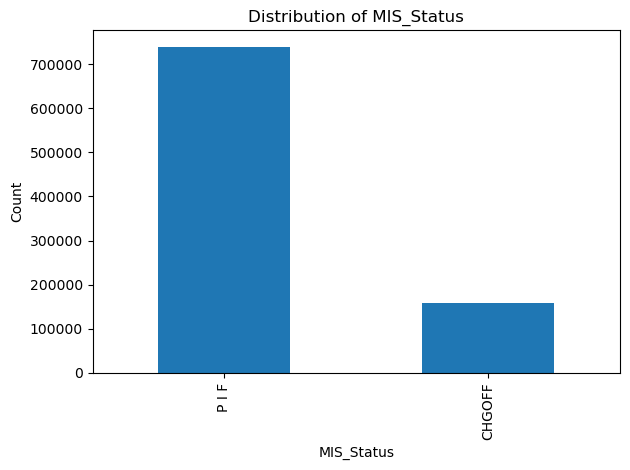

In [12]:
ax = sba_df['MIS_Status'].value_counts().plot(kind='bar')

ax.set_xlabel('MIS_Status')
ax.set_ylabel('Count')
ax.set_title('Distribution of MIS_Status')
plt.tight_layout()
plt.show()

### Descriptive Statistics of Predictors

In [7]:
# Adding new columns to help modeling

# Extracting first 3 digits from Zipcode
# cleaning zipcodes by adding missing leading zeros
sba_df['Zip_clean'] = sba_df['Zip'].astype(str).str.zfill(5)
sba_df['ZipPrefix'] = sba_df['Zip_clean'].astype(str).str[:3]

# Extracting first 2 digits from NAICS
sba_df['NAICS_Industry'] = sba_df['NAICS'].astype(str).str[:2]

In [8]:
#Create an indicator variable
sba_df['Default'] = [1 if status == 'CHGOFF' else 0 
                          for status in sba_df['MIS_Status']]

num_vars = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']

# converting currency variables to floats
for var in num_vars:
    if sba_df[var].dtype == 'object':
        sba_df[var] = sba_df[var].str.replace('$', '').str.strip().str.replace(',', '').astype('float')


# Variables to exclude from categorical vars since they were replaced/cleaned
exclude_from_cat = set(num_vars + ['NAICS', 'Zip', 'Zip_clean', 'ApprovalDate', 'DisbursementDate', 'MIS_Status', 'Default'])

# Define categorical variables by excluding numerical and replaced variables
cat_vars = [var for var in sba_df.columns if var not in exclude_from_cat]

print("Numerical Variables:", num_vars)

sba_df[num_vars].describe()

Numerical Variables: ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross']


,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross
count,897167.000000,897167.000000,897167.000000,897167.000000,8.971670e+05
mean,110.848592,11.412562,8.444305,10.807308,2.015980e+05
std,78.900862,73.793775,236.950249,237.382398,2.878066e+05
min,0.000000,0.000000,0.000000,0.000000,4.000000e+03
25%,60.000000,2.000000,0.000000,0.000000,4.249200e+04
50%,84.000000,4.000000,0.000000,1.000000,1.000000e+05
75%,120.000000,10.000000,1.000000,4.000000,2.390000e+05
max,569.000000,9999.000000,8800.000000,9500.000000,1.144632e+07


In [15]:
sba_df.dtypes

City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross    float64
MIS_Status            object
Zip_clean             object
ZipPrefix             object
NAICS_Industry        object
Default                int64
dtype: object

In [16]:
print("Categorical Variables:", cat_vars)

for var in cat_vars:
    print(f'\n{sba_df[var].value_counts()}')

Categorical Variables: ['City', 'State', 'Bank', 'BankState', 'ApprovalFY', 'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'ZipPrefix', 'NAICS_Industry']

City
LOS ANGELES         11550
HOUSTON             10229
NEW YORK             7834
CHICAGO              6009
MIAMI                5594
                    ...  
FLEMDALE                1
Bullhead City           1
WEST TOLUCA LAKE        1
TECUMESEH               1
SO. OZONE PARK          1
Name: count, Length: 32566, dtype: int64

State
CA    130488
TX     70401
NY     57394
FL     41192
PA     34801
OH     32498
IL     29594
MA     25092
MN     24359
NJ     24010
WA     23255
GA     22272
WI     21021
MO     20652
CO     20598
MI     20493
UT     18772
AZ     17624
NC     14286
IN     14079
MD     13259
VA     13207
CT     12127
NH     12023
IA     11986
KS     11455
OR     11041
OK      9945
LA      9570
ID      9496
TN      9400
RI      8948
MT      8737
AL      8360
NV      8022
KY      7720
MS      7668
NE    

In [9]:
# cleaning categorical variables with unknown/odd categories

# RevLineCr
# 28.7% of data is '0' data entry error potentially mean 'N' and they have close avg defaults
sba_df['RevLineCr_clean'] = sba_df['RevLineCr'].replace({'0': 'N'})
sba_df['RevLineCr_clean'] = sba_df['RevLineCr_clean'].where(sba_df['RevLineCr_clean'].isin(['Y', 'N']), 'Unknown')

# FranchiseCode
sba_df['FranchiseCode_clean'] = sba_df['FranchiseCode'].astype(str).where(sba_df['FranchiseCode'].astype(str).isin(['0', '1']), 'Unknown')

# LowDoc
sba_df['LowDoc_clean'] = sba_df['LowDoc'].where(sba_df['LowDoc'].isin(['Y', 'N']), 'Unknown')

cat_vars.remove('RevLineCr')
cat_vars.remove('FranchiseCode')
cat_vars.remove('LowDoc')
cat_vars += ['RevLineCr_clean', 'FranchiseCode_clean', 'LowDoc_clean']
cat_vars

['City',
 'State',
 'Bank',
 'BankState',
 'ApprovalFY',
 'NewExist',
 'UrbanRural',
 'ZipPrefix',
 'NAICS_Industry',
 'RevLineCr_clean',
 'FranchiseCode_clean',
 'LowDoc_clean']

In [10]:
# Categorical Variables Cleaned Value Counts
print("Categorical Variables Cleaned:", cat_vars)

for var in cat_vars:
    print(f'\n{sba_df[var].value_counts()}')

Categorical Variables Cleaned: ['City', 'State', 'Bank', 'BankState', 'ApprovalFY', 'NewExist', 'UrbanRural', 'ZipPrefix', 'NAICS_Industry', 'RevLineCr_clean', 'FranchiseCode_clean', 'LowDoc_clean']

City
LOS ANGELES         11550
HOUSTON             10229
NEW YORK             7834
CHICAGO              6009
MIAMI                5594
                    ...  
FLEMDALE                1
Bullhead City           1
WEST TOLUCA LAKE        1
TECUMESEH               1
SO. OZONE PARK          1
Name: count, Length: 32566, dtype: int64

State
CA    130488
TX     70401
NY     57394
FL     41192
PA     34801
OH     32498
IL     29594
MA     25092
MN     24359
NJ     24010
WA     23255
GA     22272
WI     21021
MO     20652
CO     20598
MI     20493
UT     18772
AZ     17624
NC     14286
IN     14079
MD     13259
VA     13207
CT     12127
NH     12023
IA     11986
KS     11455
OR     11041
OK      9945
LA      9570
ID      9496
TN      9400
RI      8948
MT      8737
AL      8360
NV      8022
KY    

### Visualization of Predictors

#### Numerical variables

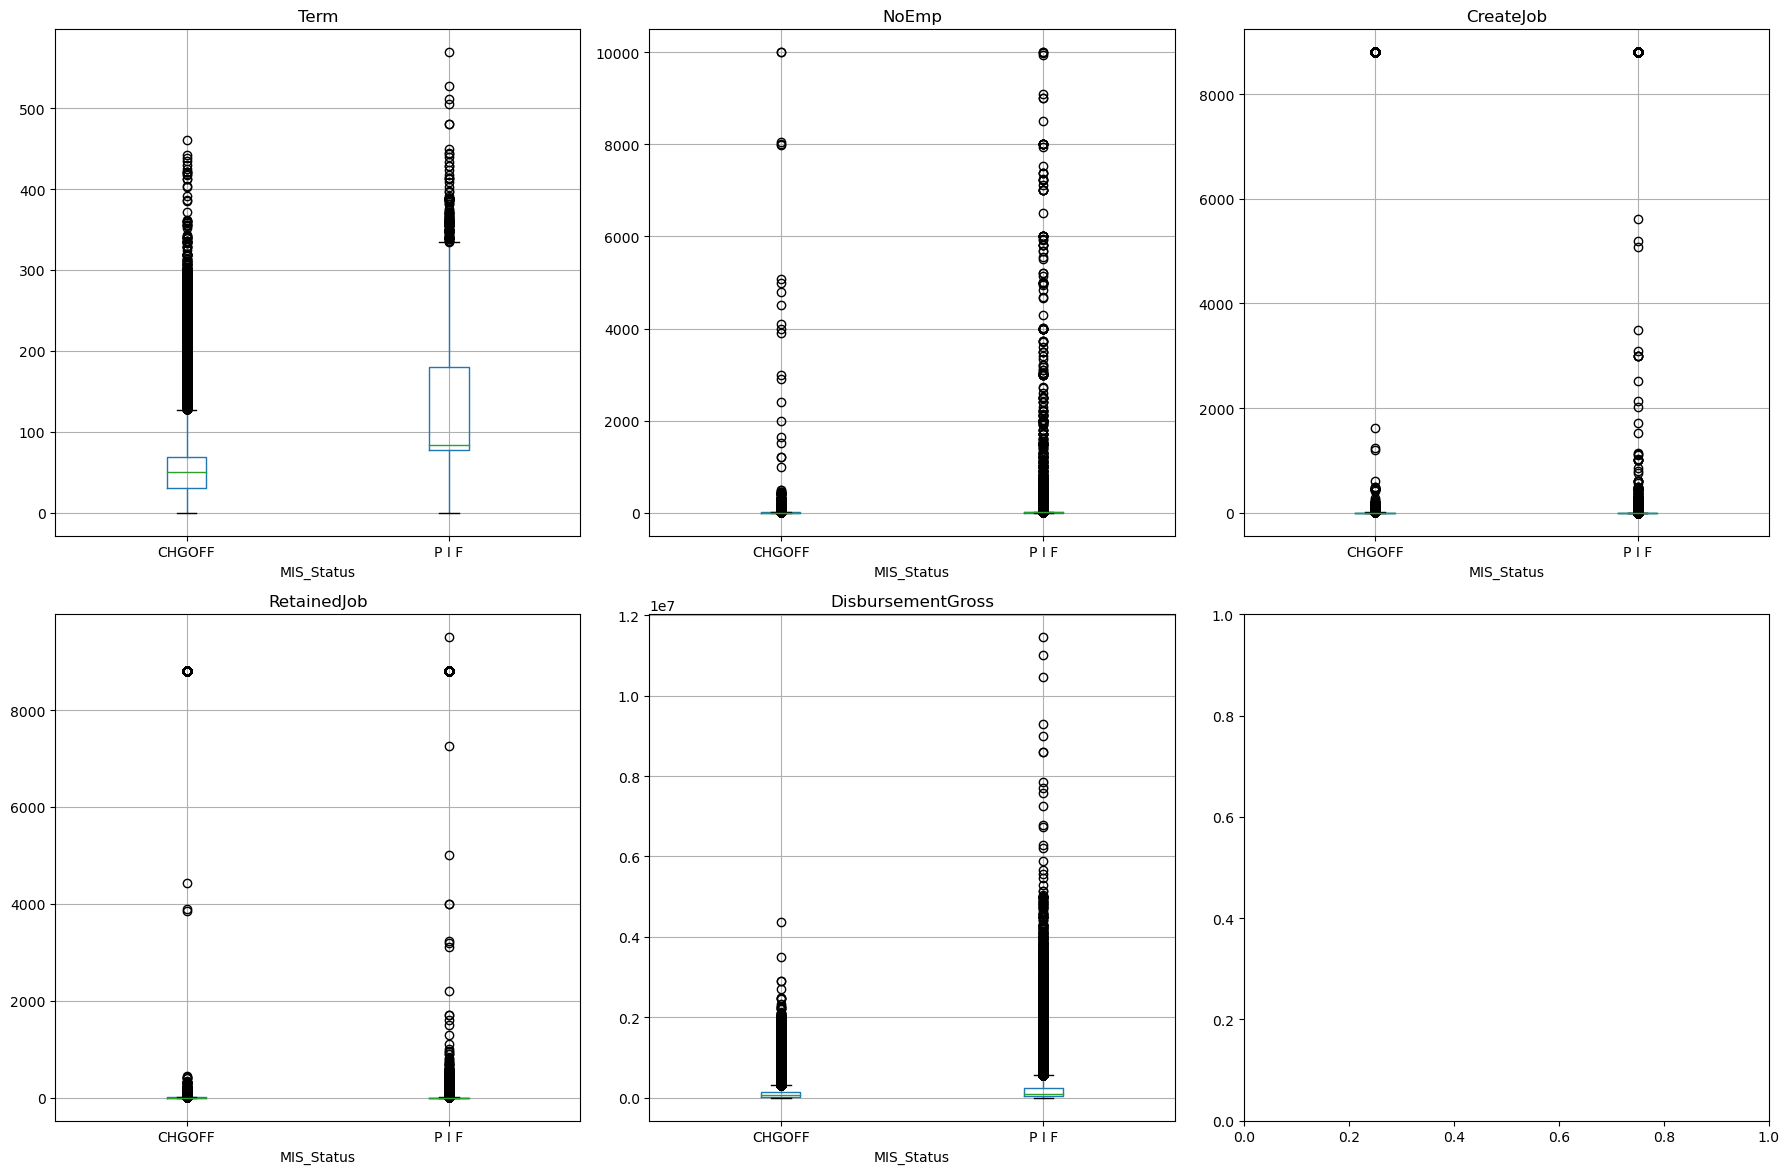

In [19]:
# Numerical variables
# side-by-side boxplots vs MIS_Status

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Manually create each boxplot
sba_df.boxplot(column='Term', by='MIS_Status', ax=axes[0,0])
sba_df.boxplot(column='NoEmp', by='MIS_Status', ax=axes[0,1])
sba_df.boxplot(column='CreateJob', by='MIS_Status', ax=axes[0,2])
sba_df.boxplot(column='RetainedJob', by='MIS_Status', ax=axes[1,0])
sba_df.boxplot(column='DisbursementGross', by='MIS_Status', ax=axes[1,1])

plt.suptitle('')
plt.tight_layout()
plt.show()

In [20]:
# boxplot summary
for var in num_vars:
    print(f'{var}:')
    print(sba_df.groupby('MIS_Status')[var].describe())
    print()

Term:
               count        mean        std  min   25%   50%    75%    max
MIS_Status                                                                
CHGOFF      157558.0   57.150446  46.478298  0.0  30.0  50.0   69.0  461.0
P I F       739609.0  122.287843  79.663118  0.0  77.0  84.0  180.0  569.0

NoEmp:
               count       mean        std  min  25%  50%   75%     max
MIS_Status                                                             
CHGOFF      157558.0   7.213325  61.508000  0.0  2.0  3.0   7.0  9999.0
P I F       739609.0  12.307120  76.125457  0.0  2.0  5.0  11.0  9999.0

CreateJob:
               count       mean         std  min  25%  50%  75%     max
MIS_Status                                                             
CHGOFF      157558.0  14.553821  335.387647  0.0  0.0  0.0  2.0  8800.0
P I F       739609.0   7.142802  210.080904  0.0  0.0  0.0  1.0  8800.0

RetainedJob:
               count       mean         std  min  25%  50%  75%     max
MIS_Status  

#### Categorical Variables

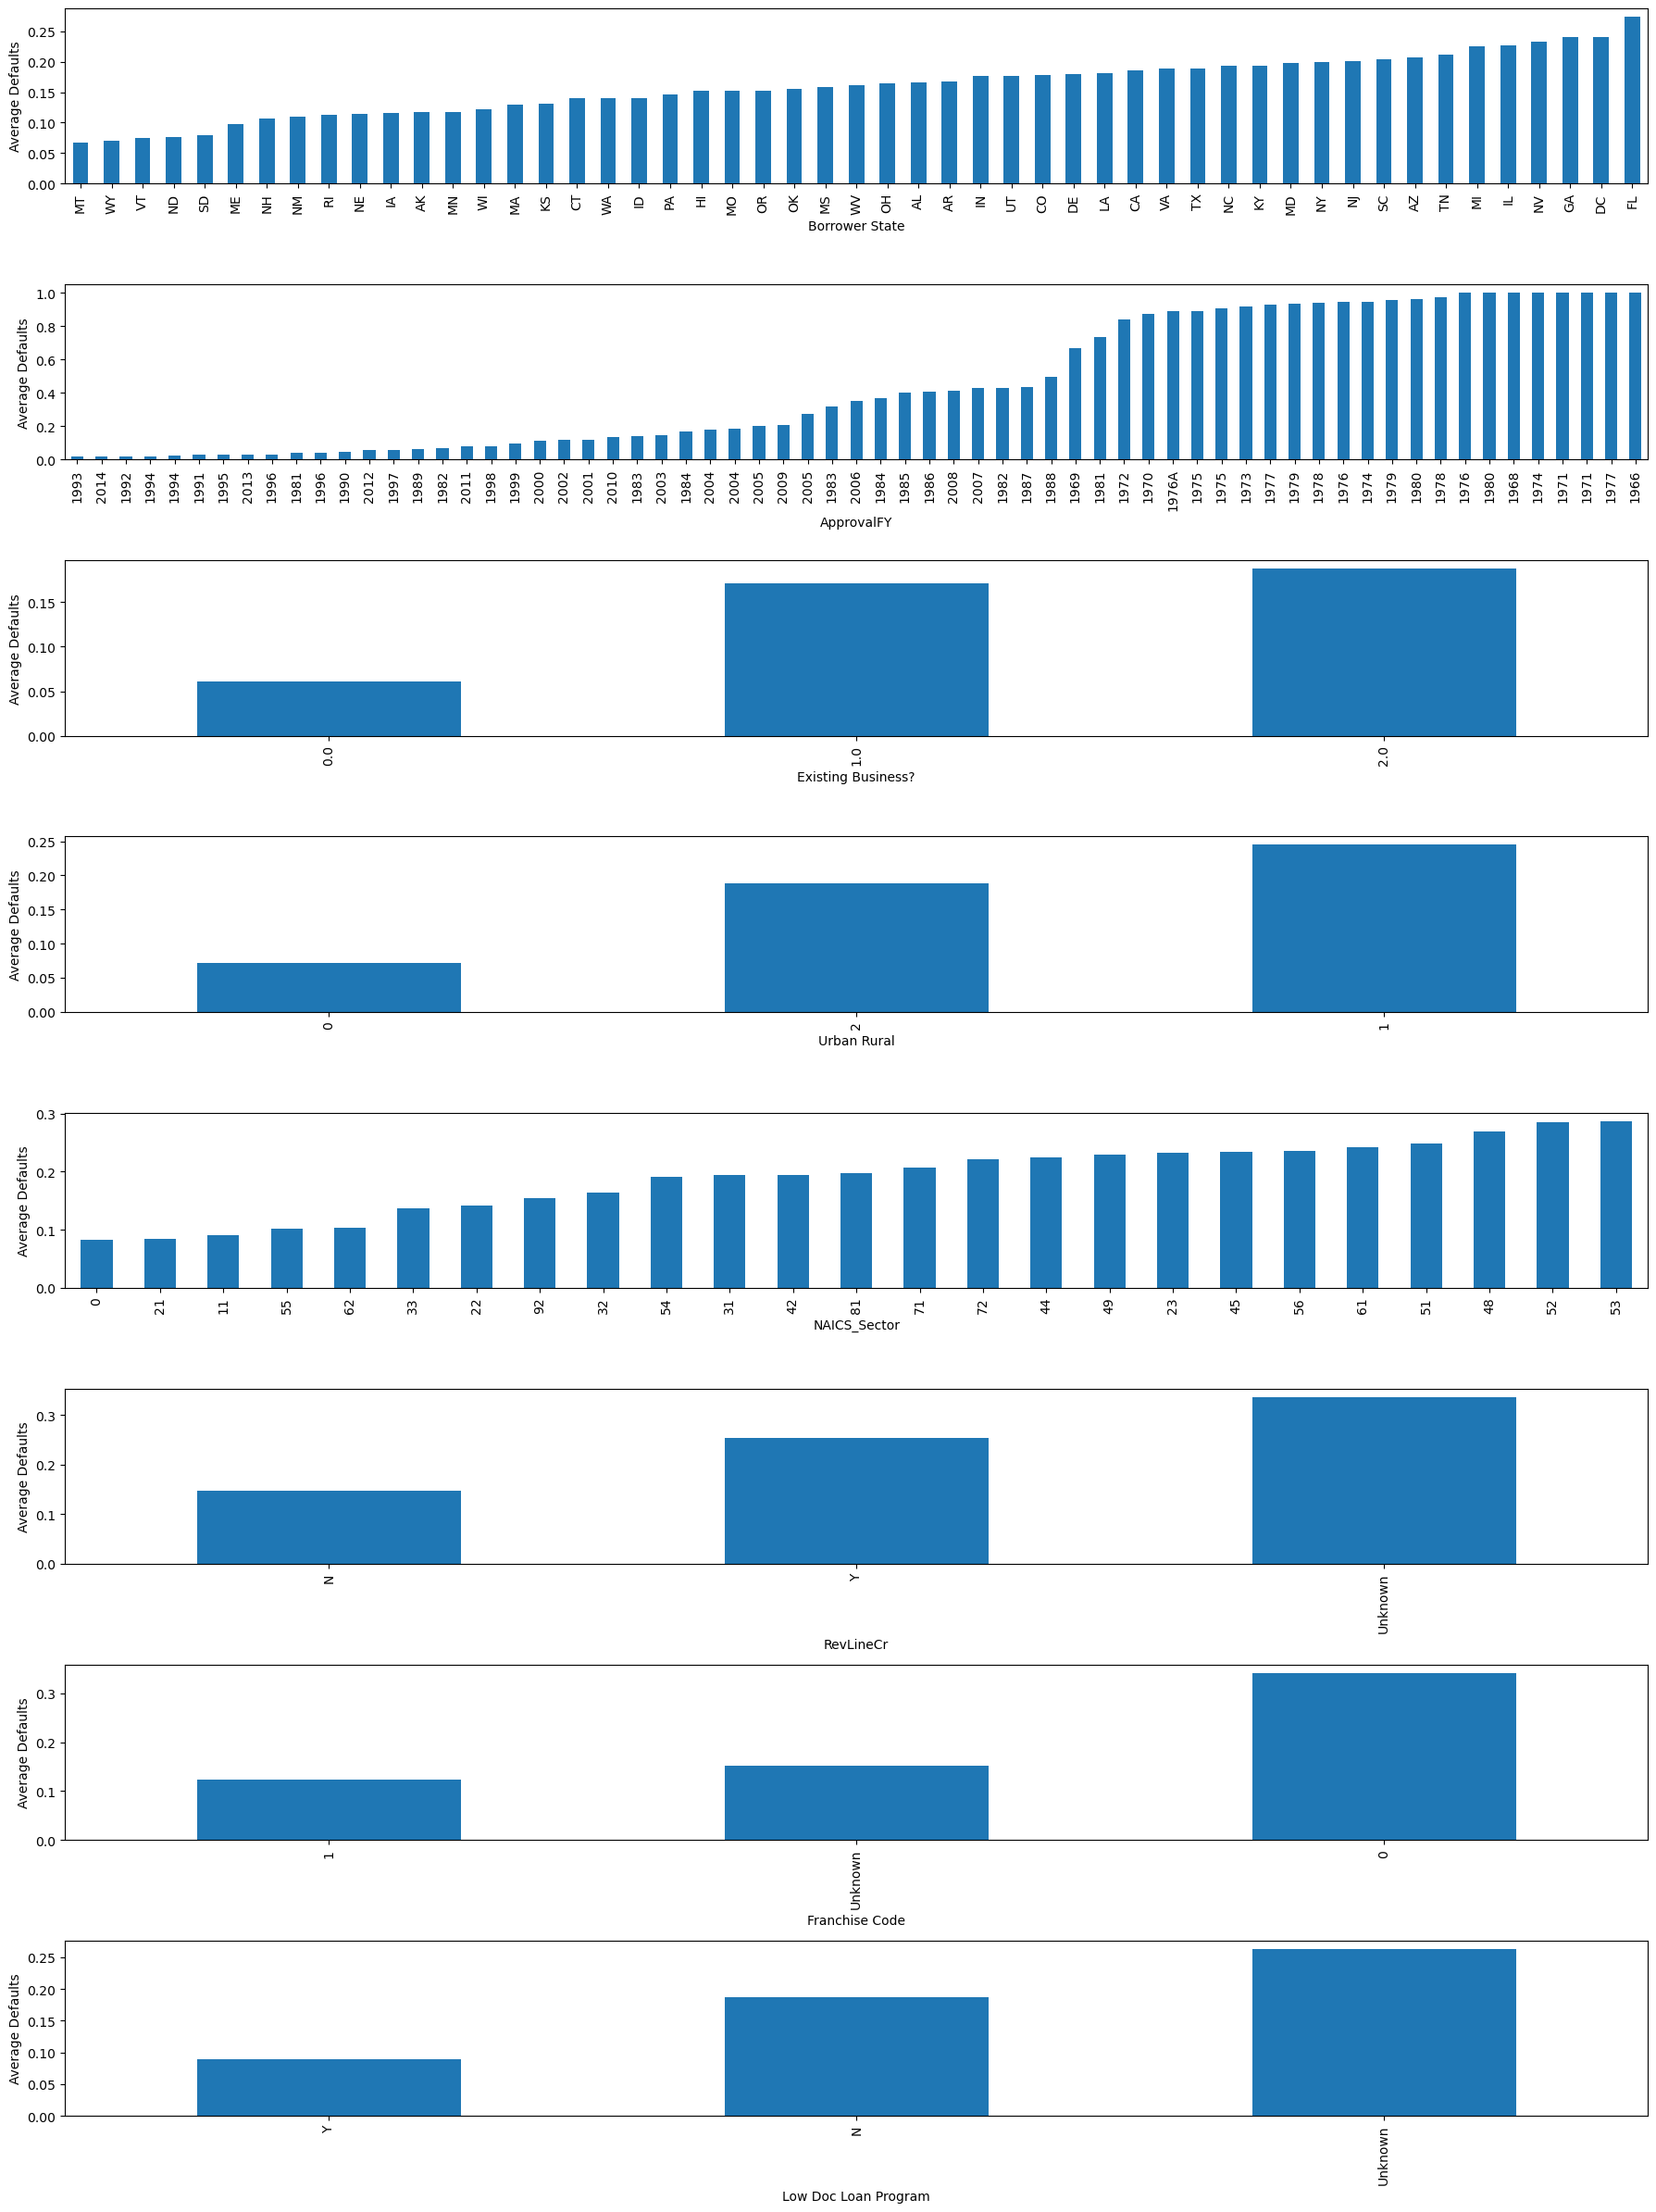

In [21]:
# Categorical Variables
# code from Chapter 10
def createGraph(group, xlabel, axis):
    groupAverage = sba_df.groupby([group])['Default'].mean()
    groupAverage = groupAverage.sort_values()
    ax = groupAverage.plot.bar(color='C0', ax=axis)
    ax.set_ylabel('Average Defaults')
    ax.set_xlabel(xlabel)
    return ax

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(18, 24))

createGraph('State', 'Borrower State', axis=axes[0])
# createGraph('Bank', 'Bank', axis=axes[0][1]) too many categories
createGraph('ApprovalFY', 'ApprovalFY', axis=axes[1])
createGraph('NewExist', 'Existing Business?', axis=axes[2])
createGraph('UrbanRural', 'Urban Rural', axis=axes[3])
# createGraph('ZipPrefix', 'Zipcode', axis=axes[2][1])
createGraph('NAICS_Industry', 'NAICS_Sector', axis=axes[4])
createGraph('RevLineCr_clean', 'RevLineCr', axis=axes[5])
createGraph('FranchiseCode_clean', 'Franchise Code', axis=axes[6])
createGraph('LowDoc_clean', 'Low Doc Loan Program', axis=axes[7])

plt.tight_layout()
plt.show()

In [19]:
# Pivot Table: Default & Categorical Variables

for var in cat_vars:
    print(f'\nPivot Table for: {var}')
    pt = sba_df.pivot_table(values='Default', index=var, aggfunc='mean')
    print(pt.sort_values('Default'))


Pivot Table for: City
                  Default
City                     
#115, BALTIMORE       0.0
McKINNEY              0.0
McGregor              0.0
McFarland             0.0
McElhattan            0.0
...                   ...
N GRAFTON             1.0
DeFuniak Springs      1.0
N Canton              1.0
N Las Vegas           1.0
Sprott                1.0

[32566 rows x 1 columns]

Pivot Table for: State
        Default
State          
MT     0.067987
WY     0.070120
VT     0.074360
ND     0.076762
SD     0.078817
ME     0.098198
NH     0.107211
NM     0.109193
RI     0.113545
NE     0.113775
IA     0.115301
AK     0.116937
MN     0.116959
WI     0.121783
MA     0.129802
KS     0.130685
CT     0.140430
WA     0.140529
ID     0.140901
PA     0.146231
HI     0.152481
MO     0.152624
OR     0.152885
OK     0.155254
MS     0.158842
WV     0.161339
OH     0.164595
AL     0.166148
AR     0.168009
IN     0.176291
UT     0.176646
CO     0.178221
DE     0.179663
LA     0.180773
CA     0.1851

In [10]:
sba_df['NAICS_Industry'] = pd.to_numeric(sba_df['NAICS_Industry'])
sba_df['ZipPrefix'] = pd.to_numeric(sba_df['ZipPrefix'])

In [11]:
# group categorical variables by average default rates into fewer categories that are more distinguishable

# State
sba_df['State_MT_SD'] = [1 if state in ['MT', 'WY', 'VT', 'ND', 'SD'] else 0 
                            for state in sba_df.State]

sba_df['State_ME_KS'] = [1 if state in ['ME', 'NH', 'NM', 'RI', 'NE', 'IA', 'AK', 'MN', 'WI', 'MA', 'KS'] else 0 
                            for state in sba_df.State]

sba_df['State_CT_AR'] = [1 if state in ['CT', 'WA', 'ID', 'PA', 'HI', 'MO', 'OR', 'OK', 'MS', 'WV', 'OH', 'AL', 'AR'] else 0 
                       for state in sba_df.State]

sba_df['State_IN_LA'] = [1 if state in ['IN', 'UT', 'CO', 'DE', 'LA'] else 0 
                          for state in sba_df.State]

sba_df['State_CA_KY'] = [1 if state in ['CA', 'VA', 'TX', 'NC', 'KY'] else 0 
                        for state in sba_df.State]

sba_df['State_MD_TN'] = [1 if state in ['MD', 'NY', 'NJ', 'SC', 'AZ', 'TN'] else 0 
                        for state in sba_df.State]

sba_df['State_MI_DC'] = [1 if state in ['MI', 'IL', 'NV', 'GA', 'DC'] else 0 
                        for state in sba_df.State]

sba_df['State_FL'] = [1 if state == 'FL' else 0 
                             for state in sba_df.State]

# NAICS_Industry

sba_df['Industry_0_62'] = [1 if code in [0, 21, 11, 55, 62] else 0 for code in sba_df.NAICS_Industry]

sba_df['Industry_33_32'] = [1 if code in [33, 22, 92, 32] else 0 for code in sba_df.NAICS_Industry]

sba_df['Industry_54_71'] = [1 if code in [54, 31, 42, 81, 71] else 0 for code in sba_df.NAICS_Industry]

sba_df['Industry_72_51'] = [1 if code in [72, 44, 49, 23, 45, 56, 61, 51] else 0 for code in sba_df.NAICS_Industry]

sba_df['Industry_48_53'] = [1 if code in [48, 52, 53] else 0 for code in sba_df.NAICS_Industry]

# ZipPrefix

sba_df['Zip_1_822'] = [1 if code in [1, 3, 5, 6, 8, 9, 55, 90, 91, 92, 93, 99, 202, 205, 343, 348, 509, 517, 518, 529, 568, 569, 579, 
                                     589, 621, 642, 643, 649, 682, 695, 698, 699, 702, 709, 733, 771, 817, 818, 819, 821, 839, 848, 854, 
                                     858, 861, 865, 867, 868, 876, 899, 942, 965, 966, 969, 987, 584, 572, 893, 692, 575, 51, 822]
                       else 0 for code in sba_df.ZipPrefix]

sba_df['Zip_999_504'] = [1 if code in [999, 830, 998, 824, 635, 591, 596, 56, 512, 585, 826, 827, 475, 586, 590, 162, 57, 598, 929, 669, 
                                       828, 580, 599, 592, 577, 581, 561, 53, 884, 565, 34, 46, 689, 507, 576, 54, 570, 955, 684, 562, 623, 
                                       679, 882, 13, 566, 597, 527, 396, 587, 829, 880, 188, 796, 567, 793, 676, 814, 877, 514, 595, 169, 
                                       594, 593, 874, 393, 573, 556, 878, 820, 825, 506, 36, 645, 646, 58, 38, 50, 40, 48, 668, 988, 542, 
                                       455, 521, 510, 678, 39, 37, 618, 41, 520, 670, 434, 688, 545, 790, 813, 394, 686, 564, 523, 174, 
                                       154, 582, 680, 862, 420, 388, 511, 549, 43, 685, 563, 128, 42, 691, 835, 881, 650, 499, 737, 883, 
                                       214, 45, 560, 47, 989, 364, 687, 811, 898, 164, 44, 875, 539, 747, 997, 996, 59, 588, 674, 571, 491,
                                       52, 831, 978, 683, 547, 540, 35, 49, 524, 845, 812, 500, 557, 416, 505, 644, 888, 176, 10, 22, 28, 
                                       541, 939, 993, 141, 718, 504,]
                       else 0 for code in sba_df.ZipPrefix]

sba_df['Zip_308_173'] = [1 if code in [308, 664, 515, 745, 725, 749, 990, 759, 857, 486, 61, 11, 653, 279, 463, 951, 221, 220, 492, 
                                       69, 756, 765, 170, 190, 804, 63, 735, 448, 661, 967, 432, 78, 975, 730, 490, 23, 312, 452, 738, 
                                       636, 626, 721, 719, 439, 195, 319, 444, 87, 810, 612, 262, 197, 758, 437, 187, 656, 780, 534, 435, 
                                       631, 351, 479, 761, 655, 945, 304, 390, 895, 779, 277, 241, 430, 781, 440, 786, 453, 921, 235, 952,
                                       936, 755, 196, 460, 186, 217, 77, 844, 855, 258, 224, 846, 182, 216, 165, 788, 757, 983, 192, 400, 
                                       412, 470, 717, 744, 610, 648, 226, 625, 149, 158, 362, 163, 473, 918, 706, 108, 357, 255, 446, 451,
                                       66, 630, 783, 802, 766, 326, 143, 354, 273, 26, 836, 288, 894, 673, 313, 417, 438, 753, 763, 970, 
                                       734, 722, 105, 320, 926, 798, 274, 372, 211, 355, 741, 271, 127, 350, 86, 441, 247, 286, 89, 613, 
                                       449, 367, 740, 917, 462, 922, 310, 253, 102, 710, 930, 433, 450, 640, 624, 139, 431, 443, 487, 956, 
                                       469, 225, 173,]
                       else 0 for code in sba_df.ZipPrefix]

sba_df['Zip_116_76'] = [1 if code in [116, 963, 964, 339, 925, 903, 209, 103, 107, 321, 386, 295, 398, 853, 387, 237, 638, 111, 891, 289, 
                                      301, 303, 480, 483, 246, 239, 259, 901, 916, 900, 109, 327, 380, 207, 604, 335, 609, 389, 300, 606, 
                                      333, 912, 555, 772, 407, 112, 256, 236,104, 349, 341, 481, 418, 249, 331, 330, 632, 742, 842, 909, 
                                      114, 328, 608, 76]
                       else 0 for code in sba_df.ZipPrefix]

sba_df['Zip_408_203'] = [1 if code in [408, 113, 347, 311, 607, 938, 482, 203]
                       else 0 for code in sba_df.ZipPrefix]

sba_df['Zip_851_332'] = [1 if code in [851, 4, 7, 95, 204, 340, 375, 696, 849, 872, 332]
                       else 0 for code in sba_df.ZipPrefix]

sba_df['Zip_000'] = [1 if code in [000] else 0 for code in sba_df.ZipPrefix]
sba_df['Zip_663'] = [1 if code in [663] else 0 for code in sba_df.ZipPrefix]
sba_df['Zip_213_866'] = [1 if code in [213,536, 715, 866] else 0 for code in sba_df.ZipPrefix]


### PART 1 Analysis:

#### Outcome Variable Distribution: 
A bar plot of the outcome variables distribution shows the imbalance in the observations.

- 739,609 loans were Paid In Full (P I F)
- 157,558 loans were Charged Off (CHGOFF)

#### Missing values and Data Entry Errors

Missing values and inconsistent data entries were carefully reviewed and handled during preprocessing to ensure the model reliability. 

Categorical variables with small amounts of missing data, such as NewExist, RevLineCr, FranchiseCode and LowDoc, were cleaned by creating new columns that grouped unclear entries into an 'Unknown' category. This preserved most of the data while reducing noise from inconsistent formatting.

#### Combining Similar Categories

Pivot tables and bar charts were created to explore average default rates across categories. Categories with similar default rates were considered for grouping to reduce the number of dummy variables and improve model simplicity. For example, states, industries, and zipcodes were grouped based on default rate tiers.

#### Potential Predictors

Some irrelevant variables were excluded due to their obvious lack of predicting power, like LoanNr_ChkDgt and Name. Other variables that can excluded, as they would not be known in advance when realistically running the model, include ChgOffDate, ChgOffPrinGr, BalanceGross, GrAppv, and SBA_Appv.

Based on the descriptive statistics and visualizations, the following variables seemed important to start with because there seems to be a separation between the different classes. The variation in distributions suggest that they may be good predictors. 

1. Term
2. NoEmp
3. CreateJob
4. DisbursementGross
5. NewExist
6. UrbanRural
7. RevLineCr
8. LowDoc
9. RetainedJob
10. NAIC_Industry
11. State
12. Zip

## Spliting data into Training and Validation sets

In [24]:
sba_df.columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'ApprovalDate',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementDate', 'DisbursementGross', 'MIS_Status', 'Zip_clean',
       'ZipPrefix', 'NAICS_Industry', 'Default', 'RevLineCr_clean',
       'FranchiseCode_clean', 'LowDoc_clean', 'State_MT_SD', 'State_ME_KS',
       'State_CT_AR', 'State_IN_LA', 'State_CA_KY', 'State_MD_TN',
       'State_MI_DC', 'State_FL', 'Industry_0_62', 'Industry_33_32',
       'Industry_54_71', 'Industry_72_51', 'Industry_48_53', 'Zip_1_822',
       'Zip_999_504', 'Zip_308_173', 'Zip_116_76', 'Zip_408_203',
       'Zip_851_332', 'Zip_000', 'Zip_663', 'Zip_213_866'],
      dtype='object')

In [12]:
# partitioning data
X = sba_df[['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'UrbanRural', 'DisbursementGross', 'RevLineCr_clean', 'FranchiseCode_clean', 'LowDoc_clean', 'State_MT_SD',
       'State_ME_KS', 'State_CT_AR', 'State_IN_LA', 'State_CA_KY',
       'State_MD_TN', 'State_MI_DC', 'State_FL', 'Industry_0_62',
       'Industry_33_32', 'Industry_54_71', 'Industry_72_51', 'Industry_48_53', 'Zip_1_822', 'Zip_999_504', 'Zip_308_173', 
        'Zip_116_76', 'Zip_408_203', 'Zip_851_332', 'Zip_000', 'Zip_663', 'Zip_213_866']]
y = sba_df['Default']

# Dropping missing values
X = X.dropna()
y = y.loc[X.index]

# Get dummies
X = pd.get_dummies(X, drop_first=True)

# training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

In [26]:
X_train.columns

Index(['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural',
       'DisbursementGross', 'State_MT_SD', 'State_ME_KS', 'State_CT_AR',
       'State_IN_LA', 'State_CA_KY', 'State_MD_TN', 'State_MI_DC', 'State_FL',
       'Industry_0_62', 'Industry_33_32', 'Industry_54_71', 'Industry_72_51',
       'Industry_48_53', 'Zip_1_822', 'Zip_999_504', 'Zip_308_173',
       'Zip_116_76', 'Zip_408_203', 'Zip_851_332', 'Zip_000', 'Zip_663',
       'Zip_213_866', 'RevLineCr_clean_Unknown', 'RevLineCr_clean_Y',
       'FranchiseCode_clean_1', 'FranchiseCode_clean_Unknown',
       'LowDoc_clean_Unknown', 'LowDoc_clean_Y'],
      dtype='object')

In [27]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(897033, 35) (897033,)
(538219, 35) (538219,)
(358814, 35) (358814,)


In [28]:
X.isnull().sum()

Term                           0
NoEmp                          0
NewExist                       0
CreateJob                      0
RetainedJob                    0
UrbanRural                     0
DisbursementGross              0
State_MT_SD                    0
State_ME_KS                    0
State_CT_AR                    0
State_IN_LA                    0
State_CA_KY                    0
State_MD_TN                    0
State_MI_DC                    0
State_FL                       0
Industry_0_62                  0
Industry_33_32                 0
Industry_54_71                 0
Industry_72_51                 0
Industry_48_53                 0
Zip_1_822                      0
Zip_999_504                    0
Zip_308_173                    0
Zip_116_76                     0
Zip_408_203                    0
Zip_851_332                    0
Zip_000                        0
Zip_663                        0
Zip_213_866                    0
RevLineCr_clean_Unknown        0
RevLineCr_

In [13]:
# Standardize the data

# Initiate scaler
sc = StandardScaler()
sc.fit(X_train)

# Standardize the training dataset
X_train_transformed = pd.DataFrame(sc.transform(X_train),index=X_train.index, columns=X_train.columns)

# Standardized the testing dataset
X_valid_transformed = pd.DataFrame(sc.transform(X_valid),index=X_valid.index, columns=X_valid.columns)

# Summary statistics after standardization
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
Term,538219.0,-4.690578e-17,1.000001,-1.404348,-0.643619,-0.339328,0.117109,5.809898
NoEmp,538219.0,-3.617277e-18,1.000001,-0.154172,-0.127079,-0.099986,-0.018708,135.295538
NewExist,538219.0,-1.957422e-16,1.000001,-2.833953,-0.620482,-0.620482,1.592989,1.592989
CreateJob,538219.0,-1.440310e-17,1.000001,-0.035402,-0.035402,-0.035402,-0.031126,37.593798
RetainedJob,538219.0,8.944179e-18,1.000001,-0.045488,-0.045488,-0.041222,-0.028424,40.480993
UrbanRural,538219.0,6.722326e-17,1.000001,-1.172328,-1.172328,0.373960,0.373960,1.920249
DisbursementGross,538219.0,2.917585e-17,1.000001,-0.686723,-0.552838,-0.352881,0.128756,39.104187
State_MT_SD,538219.0,5.642424e-17,1.000001,-0.175270,-0.175270,-0.175270,-0.175270,5.705498
State_ME_KS,538219.0,7.861636e-18,1.000001,-0.421999,-0.421999,-0.421999,-0.421999,2.369675
State_CT_AR,538219.0,4.318289e-17,1.000001,-0.506151,-0.506151,-0.506151,-0.506151,1.975696


## PART 2: Model Building

In [14]:
cutoffs = [i * 0.05 for i in range(21)]
# DisbursementGross for validation set
disb_valid = sba_df.loc[X_valid.index, 'DisbursementGross']


In [15]:
def calculate_net_profit(y_val, y_pred, disbursement):
    net_profit = []
    for actual, pred, disb in zip(y_val, y_pred, disbursement):
        if actual == 0 and pred == 0:   # TN 
            profit = 0.05 * disb
        elif actual == 0 and pred == 1: # FP
            profit = 0
        elif actual == 1 and pred == 0: # FN
            profit = -5 * 0.05 * disb
        else:                           # TP
            profit = 0
        net_profit.append(profit)

    total_profit = sum(net_profit)
    return total_profit

In [16]:
def best_threshold(y_val, y_proba, disbursement, cutoffs):
    best_profit = 0
    best_thresh = 0
    best_pred = 0

    for threshold in cutoffs:
        # https://stackoverflow.com/questions/19984957/scikit-learn-predict-default-threshold
        
        y_pred = (y_proba >= threshold).astype(int)

        # calculating profit with function
        profit = calculate_net_profit(y_val, y_pred, disbursement)
        
        print(f"Threshold: {threshold:.2f}")
        print(f"Total Net Profit: ${profit:,.2f}")

        # printing confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        print(cm)
        print()

        # determining highest profit and threshold based on validation probabilites
        if profit > best_profit:
            best_profit = profit
            best_thresh = threshold
            best_pred = y_pred

    print(f"Best Threshold: {best_thresh:.2f}")
    print(f"Net Profit: ${best_profit:,.2f}")

    
    print("\nBEST Test Set Classification Report:")
    print(classification_report(y_val, best_pred))

   
    return best_pred

### kNN

In [17]:
recall_scores = []

for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_transformed, y_train)

    recall_scores.append({
        'k': k,
        'score': recall_score(y_valid, knn.predict(X_valid_transformed)) 
        # accuracy_score() or recall_score()
    })

# Convert results to a pandas data frame
recall_scores = pd.DataFrame(recall_scores)
recall_scores.sort_values(by='score', ascending=False)


,k,score
0,1,0.607947
2,3,0.598331
4,5,0.585981
6,7,0.573345
8,9,0.564969
10,11,0.557307
12,13,0.548963
9,10,0.521672
7,8,0.521561
11,12,0.520226


In [17]:
# best k value
best_model_knn = KNeighborsClassifier(n_neighbors=3) 
best_model_knn.fit(X_train_transformed, y_train)

# default threshold 0.5
y_pred_knn = best_model_knn.predict(X_valid_transformed)

# Probabilities from model
y_proba_knn = best_model_knn.predict_proba(X_valid_transformed)[:, 1]

# Threshold Evaluation based on net profit
# Print summary information
print("kNN Summary:")

# Find best threshold with function
best_pred_knn = best_threshold(y_valid, y_proba_knn, disb_valid, cutoffs)

print("Confusion Matrix on test set:")
print(classificationSummary(y_valid, best_pred_knn, class_names=best_model_knn.classes_))

kNN Summary:
Threshold: 0.00
Total Net Profit: $0.00
[[     0 295899]
 [     0  62915]]

Threshold: 0.05
Total Net Profit: $1,961,538,136.95
[[250101  45798]
 [ 12851  50064]]

Threshold: 0.10
Total Net Profit: $1,961,538,136.95
[[250101  45798]
 [ 12851  50064]]

Threshold: 0.15
Total Net Profit: $1,961,538,136.95
[[250101  45798]
 [ 12851  50064]]

Threshold: 0.20
Total Net Profit: $1,961,538,136.95
[[250101  45798]
 [ 12851  50064]]

Threshold: 0.25
Total Net Profit: $1,961,538,136.95
[[250101  45798]
 [ 12851  50064]]

Threshold: 0.30
Total Net Profit: $1,961,538,136.95
[[250101  45798]
 [ 12851  50064]]

Threshold: 0.35
Total Net Profit: $1,830,571,815.90
[[281096  14803]
 [ 25271  37644]]

Threshold: 0.40
Total Net Profit: $1,830,571,815.90
[[281096  14803]
 [ 25271  37644]]

Threshold: 0.45
Total Net Profit: $1,830,571,815.90
[[281096  14803]
 [ 25271  37644]]

Threshold: 0.50
Total Net Profit: $1,830,571,815.90
[[281096  14803]
 [ 25271  37644]]

Threshold: 0.55
Total Net Profi

### KNN Model Summary:

For the k-Nearest Neighbors model, I first compared recall scores across different values of k. According to the output, k=1 produced the highest recall. However, there was a risk of overfitting so to improve the model's stability and ability to generalize, I selected k=3 which had the second-highest recall.

Before fitting, I normalized the predictors using StandardScaler to ensure all variables were on the same scale. This step is essential for KNN because the algorithm relies on Euclidean distances which would be skewed by predictors with large values.

The model’s threshold evaluation identified 0.05 as the optimal cutoff which produced a maximum net profit of $1,961,538,136.95. The recall was also 0.80. The 0.05 cutoff is where expected profit peaks in the gains and lift chat. This confirms that the model is not only maximizing recall but also aligned with the business goal of maximizing net profit.

### Single Tree w Class Weights (CW)

In [18]:
defaultTree_cw = DecisionTreeClassifier(criterion="entropy", class_weight={0:1,1:5}, random_state=1)
defaultTree_cw.fit(X_train, y_train)
classes = defaultTree_cw.classes_

# predicting with default 0.5 threshold
y_pred_cw = defaultTree_cw.predict(X_valid)

# Probabilities from model
y_proba_cw = defaultTree_cw.predict_proba(X_valid)[:, 1]


In [20]:
# AUC score
auc_score = roc_auc_score(y_valid, y_proba_cw)
print(f"Single Tree - Test AUC: {auc_score:.4f}")

Single Tree - Test AUC: 0.8419


In [21]:
# DisbursementGross for validation set
disb_valid = sba_df.loc[X_valid.index, 'DisbursementGross']

# Print summary information
print("Single Tree with Weights Classifier Summary:")

# Find best threshold with function
best_pred_1 = best_threshold(y_valid, y_proba_cw, disb_valid, cutoffs)

print("Confusion Matrix on test set:")
print(classificationSummary(y_valid, best_pred_1, class_names=classes))

Single Tree with Weights Classifier Summary:
Threshold: 0.00
Total Net Profit: $0.00
[[     0 295899]
 [     0  62915]]

Threshold: 0.05
Total Net Profit: $2,275,376,027.20
[[280097  15802]
 [ 16577  46338]]

Threshold: 0.10
Total Net Profit: $2,275,376,027.20
[[280097  15802]
 [ 16577  46338]]

Threshold: 0.15
Total Net Profit: $2,275,376,027.20
[[280097  15802]
 [ 16577  46338]]

Threshold: 0.20
Total Net Profit: $2,275,379,827.20
[[280112  15787]
 [ 16577  46338]]

Threshold: 0.25
Total Net Profit: $2,275,379,827.20
[[280112  15787]
 [ 16577  46338]]

Threshold: 0.30
Total Net Profit: $2,275,379,827.20
[[280112  15787]
 [ 16577  46338]]

Threshold: 0.35
Total Net Profit: $2,275,402,327.20
[[280121  15778]
 [ 16577  46338]]

Threshold: 0.40
Total Net Profit: $2,275,402,327.20
[[280121  15778]
 [ 16577  46338]]

Threshold: 0.45
Total Net Profit: $2,275,421,077.20
[[280127  15772]
 [ 16577  46338]]

Threshold: 0.50
Total Net Profit: $2,275,501,077.20
[[280141  15758]
 [ 16577  46338]]


#### Single Tree Classifier Summary:

Single tree was trained using the entropy criterion. There is no normalization needed for trees because they are not distance based, a random state was set for reproducibility, and the class imbalance was addressed by setting the class_weight parameter. 

The validation set was evaluated with different cutoff values. The greatest profit of $2,275,642,821.25 came with the cutoff value 0.85. The model achieved 91% accuracy, with a recall of 74% for the default class. Since misclassifying defaults carries a higher cost, recall was prioritized to minimize false negatives. The confusion matrix shows a good balance in correctly identifying defaults and maintaining profitability.

### Bagging w CW

In [33]:
bagging_cw = BaggingClassifier(defaultTree_cw, n_estimators=500, random_state=1)
bagging_cw.fit(X_train, y_train)

# predicting with default 0.5 threshold
y_pred_bag_cw = bagging_cw.predict(X_valid)

# Probabilities from model
y_proba_bag_cw = bagging_cw.predict_proba(X_valid)[:, 1]



In [ ]:
# AUC score
auc_score_bg = roc_auc_score(y_valid, y_proba_bag_cw)
print(f"Bagging - Test AUC: {auc_score_bg:.4f}")

In [34]:
# Print summary information
print("Bagging Classifier with Weights Summary:")

# Find best threshold
best_pred_bg = best_threshold(y_valid, y_proba_bag_cw, disb_valid, cutoffs)

print("Confusion Matrix on test set:")
print(classificationSummary(y_valid, best_pred_bg, class_names=classes))

Bagging Classifier with Weights Summary:
Threshold: 0.00
Total Net Profit: $0.00
[[     0 295899]
 [     0  62915]]

Threshold: 0.05
Total Net Profit: $2,570,975,381.95
[[244333  51566]
 [  2126  60789]]

Threshold: 0.10
Total Net Profit: $2,654,412,124.40
[[257679  38220]
 [  3134  59781]]

Threshold: 0.15
Total Net Profit: $2,680,166,015.50
[[265521  30378]
 [  4166  58749]]

Threshold: 0.20
Total Net Profit: $2,688,599,027.00
[[270450  25449]
 [  5020  57895]]

Threshold: 0.25
Total Net Profit: $2,675,355,075.60
[[274200  21699]
 [  6031  56884]]

Threshold: 0.30
Total Net Profit: $2,643,479,480.05
[[277486  18413]
 [  7156  55759]]

Threshold: 0.35
Total Net Profit: $2,609,739,546.10
[[280034  15865]
 [  8257  54658]]

Threshold: 0.40
Total Net Profit: $2,562,324,888.55
[[282101  13798]
 [  9431  53484]]

Threshold: 0.45
Total Net Profit: $2,501,130,725.80
[[283965  11934]
 [ 10731  52184]]

Threshold: 0.50
Total Net Profit: $2,435,585,383.85
[[285545  10354]
 [ 12170  50745]]

Thr

#### Bagging Classifier Summary:
Bagging with 500 decision trees and the entropy criterion was used. Once again, no normalization was required and the model was fit with a fixed random state. On the validation set, the model achieved 91% overall accuracy. Recall for defaults (92%) improved over the single tree, reducing false negatives while maintaining high specificity for the non-defaults. Based on the threshold evaluation, the most profitable cutoff was 0.20 which yielded a maximum net profit of $2,688,599,027.00.

### XGBoost w CW

In [35]:
# Define base XGBoost model with class weights
xgb_cw = XGBClassifier(eval_metric='auc', random_state=1, scale_pos_weight=5)

# Parameter grid
param_grid_cw = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 4], # weak learner Ch 13 notes: "Always tune this. Low values (e.g., 3–5) are often better for generalization"
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search with 3-fold cross-validation
grid_search_xg_cw = GridSearchCV(estimator=xgb_cw,
                           param_grid=param_grid_cw,
                           scoring='roc_auc',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit with class weights
grid_search_xg_cw.fit(X_train, y_train)

# Best model with class weights
best_xg_cw = grid_search_xg_cw.best_estimator_

# 0.5 default threshold
y_pred_xg_cw = best_xg_cw.predict(X_valid)

y_proba_xg_cw = best_xg_cw.predict_proba(X_valid)[:, 1]

print("Best Hyperparameters for XGBoost with class weights:")
print(grid_search_xg_cw.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters for XGBoost with class weights:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}


In [36]:
print("XGBoost Classifier with Weights Summary:")

# Find best threshold
best_pred_xg = best_threshold(y_valid, y_proba_xg_cw, disb_valid, cutoffs)

print("Confusion Matrix on test set:")
print(classificationSummary(y_valid, best_pred_xg, class_names=grid_search_xg_cw.classes_))

XGBoost Classifier with Weights Summary:
Threshold: 0.00
Total Net Profit: $0.00
[[     0 295899]
 [     0  62915]]

Threshold: 0.05
Total Net Profit: $1,371,674,793.45
[[116000 179899]
 [   229  62686]]

Threshold: 0.10
Total Net Profit: $1,961,526,790.90
[[182284 113615]
 [   568  62347]]

Threshold: 0.15
Total Net Profit: $2,255,086,872.00
[[205212  90687]
 [   813  62102]]

Threshold: 0.20
Total Net Profit: $2,378,066,084.55
[[218072  77827]
 [  1049  61866]]

Threshold: 0.25
Total Net Profit: $2,442,931,660.55
[[227813  68086]
 [  1397  61518]]

Threshold: 0.30
Total Net Profit: $2,502,200,887.70
[[235692  60207]
 [  1828  61087]]

Threshold: 0.35
Total Net Profit: $2,544,046,684.60
[[243360  52539]
 [  2496  60419]]

Threshold: 0.40
Total Net Profit: $2,568,487,098.60
[[251060  44839]
 [  3464  59451]]

Threshold: 0.45
Total Net Profit: $2,568,340,055.45
[[257723  38176]
 [  4513  58402]]

Threshold: 0.50
Total Net Profit: $2,546,214,824.30
[[264104  31795]
 [  5772  57143]]

Thr

Test AUC: 0.9643


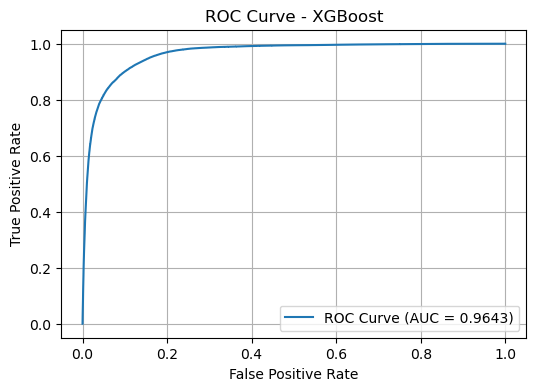

In [43]:
# AUC-ROC 
# ROC Curve
auc_score_xg = roc_auc_score(y_valid, y_proba_xg_cw)
print(f"Test AUC: {auc_score_xg:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_valid, y_proba_xg_cw)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score_xg:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### XGBoost Classifer Summary:

I fit an XGBoost classifier with class weighting to address class imbalance. Unlike bagging or random forests, boosting requires weak learners to function effectively. So XGBoost uses small trees with low max_depth, like 2–4. This way the model learns complex patterns without overfitting. Hyperparameters were tuned through a grid search with 5-fold cross-validation, and the best model used 100 trees, a learning rate of 0.1, maximum depth of 4, and subsample and column sample rates of 0.8.

On the validation set, the threshold that yielded the highest profit of $2,568,487,098.60 was 0.40. The model achieved the an accuracy of 0.86 and AUC of 0.9643. The default class had a recall of 94% which empahsizes the models strength in catching high risk borrowers. This does come at the trade off of a lower precision (0.57), but the high recall reduces the high cost of misclassifying defaults as paid in full.

### RandomForestClassifer w CW

In [28]:
rf_cw = RandomForestClassifier(random_state=1, class_weight={0:1, 1:5})

# Define parameter grid (same as before)
param_grid_cw = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 0.7]
}

# Grid Search with 3-fold CV
grid_search_rf_cw = GridSearchCV(
    estimator=rf_cw,
    param_grid=param_grid_cw,
    cv=3,
    scoring='roc_auc', 
    n_jobs=-1,
    verbose=1
)

# Fit grid search on training data
grid_search_rf_cw.fit(X_train, y_train)

# Best model evaluation
best_model_rf_cw = grid_search_rf_cw.best_estimator_
y_pred_rf_cw = best_model_rf_cw.predict(X_valid)

# Probabilities from model
y_proba_rf_cw = best_model_rf_cw.predict_proba(X_valid)[:, 1]

print("Best Parameters for Random Forest Classifier with Class Weights:")
print(grid_search_rf_cw.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for Random Forest Classifier with Class Weights:
{'max_depth': 20, 'max_features': 0.7, 'min_samples_split': 10, 'n_estimators': 200}


In [48]:
print("Random Forest Classifier with Weights Summary:")

# Find best threshold
best_pred_rf = best_threshold(y_valid, y_proba_rf_cw, disb_valid, cutoffs)

print("Confusion Matrix on test set:")
print(classificationSummary(y_valid, best_pred_rf, class_names=grid_search_rf_cw.classes_))

Random Forest Classifier with Weights Summary:
Threshold: 0.00
Total Net Profit: $0.00
[[     0 295899]
 [     0  62915]]

Threshold: 0.05
Total Net Profit: $2,352,021,192.75
[[217884  78015]
 [   986  61929]]

Threshold: 0.10
Total Net Profit: $2,518,379,217.45
[[237453  58446]
 [  1525  61390]]

Threshold: 0.15
Total Net Profit: $2,599,436,048.15
[[248818  47081]
 [  2106  60809]]

Threshold: 0.20
Total Net Profit: $2,650,101,947.85
[[256676  39223]
 [  2736  60179]]

Threshold: 0.25
Total Net Profit: $2,682,608,868.20
[[262648  33251]
 [  3380  59535]]

Threshold: 0.30
Total Net Profit: $2,698,678,749.35
[[267336  28563]
 [  4023  58892]]

Threshold: 0.35
Total Net Profit: $2,693,480,600.50
[[271240  24659]
 [  4812  58103]]

Threshold: 0.40
Total Net Profit: $2,681,918,043.90
[[274415  21484]
 [  5602  57313]]

Threshold: 0.45
Total Net Profit: $2,647,277,369.30
[[277147  18752]
 [  6531  56384]]

Threshold: 0.50
Total Net Profit: $2,604,691,846.85
[[279496  16403]
 [  7515  55400]

In [48]:
# feature importance
importances_rf = best_model_rf_cw.feature_importances_

df1 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances_rf
})
df1 = df1.sort_values('importance')
df1

,feature,importance
28,Zip_213_866,0.000000
27,Zip_663,0.000005
25,Zip_851_332,0.000016
20,Zip_1_822,0.000102
26,Zip_000,0.000472
24,Zip_408_203,0.000568
33,LowDoc_clean_Unknown,0.000655
7,State_MT_SD,0.001608
19,Industry_48_53,0.001772
16,Industry_33_32,0.001973


### Random Forest Classifer Summary:

The random forest classifer was trained with hyperparameter tuning to optimize the predicting performance with class imbalance. On the validation set, the most profitable threshold was 0.30 and yielded a maximum profit of $2,698,678,749.35. The model achieved 91% accuracy and a high recall for defaults of 94%. Similar to XGBoost, the precision is lower to balance the risk of missing defaults. 

### Logit (No regularization)

In [23]:
# Logistic regression with no regularization
logit = LogisticRegression(penalty="l2", C=1e42, solver='liblinear', random_state=1, tol=1e-28, max_iter=10000)
logit.fit(X_train, y_train)

# Default 0.5 threshold
y_pred_log = logit.predict(X_valid)
 
# Probabilities from model
y_proba_log = logit.predict_proba(X_valid)[:, 1]

pd.set_option('display.width', 95)
pd.set_option('display.precision',4)
pd.set_option('display.max_columns', 40)

# intercept and coefficients
print('intercept ', logit.intercept_[0])
print()
print(pd.DataFrame({'coeff': logit.coef_[0]}, index=X.columns).transpose())
pd.reset_option('display.width')
print('AIC', AIC_score(y_valid, y_pred_log, df=len(X_train.columns) + 1))
pd.reset_option('display.width')
pd.reset_option('display.precision')
pd.reset_option('display.max_columns')
print()

intercept  0.6144512884437405

         Term   NoEmp  NewExist  CreateJob  RetainedJob  UrbanRural  DisbursementGross  \
coeff -0.0259 -0.0076    0.0511     0.0031      -0.0028      0.2923         6.1396e-07   

       State_MT_SD  State_ME_KS  State_CT_AR  State_IN_LA  State_CA_KY  State_MD_TN  \
coeff       -0.591      -0.2863      -0.0659       0.1523       0.4183        0.121   

       State_MI_DC  State_FL  Industry_0_62  Industry_33_32  Industry_54_71  Industry_72_51  \
coeff       0.2872    0.5769        -0.0855          -0.116           0.139          0.3586   

       Industry_48_53  Zip_1_822  Zip_999_504  Zip_308_173  Zip_116_76  Zip_408_203  \
coeff          0.3185    -0.1142      -0.3578      -0.0134      0.4203       0.6263   

       Zip_851_332  Zip_000  Zip_663  Zip_213_866  RevLineCr_clean_Unknown  \
coeff       0.0339   0.2755   0.0025       0.0039                   0.3366   

       RevLineCr_clean_Y  FranchiseCode_clean_1  FranchiseCode_clean_Unknown  \
coeff     

In [24]:
# Print summary information
print("LogisticRegression (no regularization) Summary:")

# Find best threshold with function
best_pred_log = best_threshold(y_valid, y_proba_log, disb_valid, cutoffs)

print("Confusion Matrix on test set:")
print(classificationSummary(y_valid, best_pred_log, class_names=classes))

LogisticRegression (no regularization) Summary:
Threshold: 0.00
Total Net Profit: $0.00
[[     0 295899]
 [     0  62915]]

Threshold: 0.05
Total Net Profit: $1,432,895,127.00
[[104000 191899]
 [  3846  59069]]

Threshold: 0.10
Total Net Profit: $1,682,563,090.45
[[154816 141083]
 [  6003  56912]]

Threshold: 0.15
Total Net Profit: $1,814,016,766.95
[[196203  99696]
 [  9186  53729]]

Threshold: 0.20
Total Net Profit: $1,849,989,566.45
[[226138  69761]
 [ 13151  49764]]

Threshold: 0.25
Total Net Profit: $1,832,735,303.60
[[246575  49324]
 [ 17735  45180]]

Threshold: 0.30
Total Net Profit: $1,768,146,361.30
[[260769  35130]
 [ 23046  39869]]

Threshold: 0.35
Total Net Profit: $1,689,300,728.55
[[271008  24891]
 [ 28365  34550]]

Threshold: 0.40
Total Net Profit: $1,602,114,272.45
[[278200  17699]
 [ 33722  29193]]

Threshold: 0.45
Total Net Profit: $1,511,970,551.30
[[283536  12363]
 [ 39038  23877]]

Threshold: 0.50
Total Net Profit: $1,417,822,392.15
[[287370   8529]
 [ 44312  18603

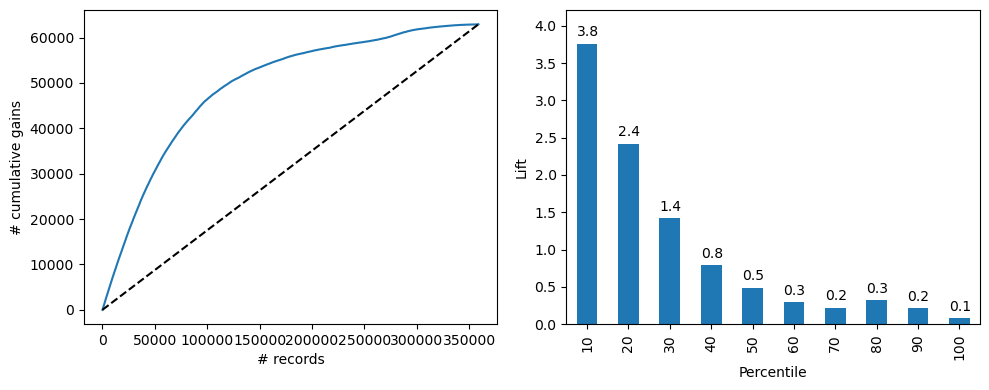

In [25]:
# gains and lift chart
proba_log = logit.predict_proba(X_valid)
logit_result = pd.DataFrame({'actual': y_valid, 
                            'p(0)': [p[0] for p in proba_log],
                            'p(1)': [p[1] for p in proba_log],
                            'predicted': best_pred_log,
                          })
logit_result = logit_result.sort_values(by=['p(1)'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(logit_result.actual, ax=axes[0])
liftChart(logit_result.actual, title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

### Logistic Regression (No Regularization) Summary:

I fit a logistic regression with no regularization using the liblinear solver. The model did converge by setting a high iteration limit and small tolerance. Since this model had no regularization, the predictor did not have to be standardized.

The optimal threshold was 0.20 and had a maximum profit of $1,849,989,566.45. At this threshold, recall for the positive class was 0.79, with an overall accuracy of 76.9%. Precision was lower (0.42), reflecting the tradeoff of catching more defaults versus increasing false positives.

The gains and lift charts confirm the model’s effectiveness. The first decile had a lift of 3.8, which shows the model's strong ability to rank risky loans compared to random chance. This model provides a clear, interpretable baseline for comparison with more complex methods. 

### Lasso

In [27]:
# fitting model with lasso w liblinear
logit_L1 = LogisticRegressionCV(
    penalty="l1", 
    solver='saga',
    cv=5, 
    scoring='recall',
    class_weight={0: 1, 1: 5},
    random_state=1,
    Cs=20, 
    tol=1e-4, 
    max_iter=10000,
    n_jobs=-1)

logit_L1.fit(X_train_transformed, y_train)

LogisticRegressionCV(Cs=20, class_weight={0: 1, 1: 5}, cv=5, max_iter=10000,
                     n_jobs=-1, penalty='l1', random_state=1, scoring='recall',
                     solver='saga')

In [30]:
# predicting with default 0.5 threshold
y_pred_l1 = logit_L1.predict(X_valid_transformed)

# Probabilities from model
y_proba_l1 = logit_L1.predict_proba(X_valid_transformed)[:, 1]


pd.set_option('display.width', 95)
pd.set_option('display.precision',4)
pd.set_option('display.max_columns', 40)
print('intercept ', logit_L1.intercept_[0])

print(pd.DataFrame({'coeff': logit_L1.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(y_valid, y_pred_l1, df=len(X_train.columns) + 1))
pd.reset_option('display.width')
pd.reset_option('display.precision')
pd.reset_option('display.max_columns')


intercept  -0.5437118619596117
        Term  NoEmp  NewExist  CreateJob  RetainedJob  UrbanRural  DisbursementGross  \
coeff -1.314    0.0       0.0        0.0          0.0      0.1743             0.0735   

       State_MT_SD  State_ME_KS  State_CT_AR  State_IN_LA  State_CA_KY  State_MD_TN  \
coeff      -0.0243      -0.0827      -0.0273          0.0       0.0474          0.0   

       State_MI_DC  State_FL  Industry_0_62  Industry_33_32  Industry_54_71  Industry_72_51  \
coeff          0.0    0.0296        -0.0463         -0.0044             0.0          0.0606   

       Industry_48_53  Zip_1_822  Zip_999_504  Zip_308_173  Zip_116_76  Zip_408_203  \
coeff          0.0053        0.0      -0.0806          0.0      0.1115       0.0124   

       Zip_851_332  Zip_000  Zip_663  Zip_213_866  RevLineCr_clean_Unknown  \
coeff          0.0   0.0191      0.0          0.0                   0.0085   

       RevLineCr_clean_Y  FranchiseCode_clean_1  FranchiseCode_clean_Unknown  \
coeff         

In [31]:
# Print summary information
print("Lasso with Weights Summary:")

# Find best threshold
best_pred_l1 = best_threshold(y_valid, y_proba_l1, disb_valid, cutoffs)

print("Confusion Matrix on test set:")
print(classificationSummary(y_valid, best_pred_l1, class_names=classes))

Lasso with Weights Summary:
Threshold: 0.00
Total Net Profit: $0.00
[[     0 295899]
 [     0  62915]]

Threshold: 0.05
Total Net Profit: $643,867,461.95
[[ 34777 261122]
 [   487  62428]]

Threshold: 0.10
Total Net Profit: $1,144,522,222.75
[[ 62562 233337]
 [  1373  61542]]

Threshold: 0.15
Total Net Profit: $1,275,212,405.05
[[ 73327 222572]
 [  2039  60876]]

Threshold: 0.20
Total Net Profit: $1,318,888,199.25
[[ 81509 214390]
 [  2662  60253]]

Threshold: 0.25
Total Net Profit: $1,354,045,068.35
[[ 90836 205063]
 [  3218  59697]]

Threshold: 0.30
Total Net Profit: $1,440,348,279.50
[[107362 188537]
 [  3768  59147]]

Threshold: 0.35
Total Net Profit: $1,537,994,658.10
[[126641 169258]
 [  4546  58369]]

Threshold: 0.40
Total Net Profit: $1,661,909,592.45
[[151925 143974]
 [  5696  57219]]

Threshold: 0.45
Total Net Profit: $1,738,153,237.15
[[177470 118429]
 [  7593  55322]]

Threshold: 0.50
Total Net Profit: $1,787,762,474.45
[[201176  94723]
 [ 10058  52857]]

Threshold: 0.55
To

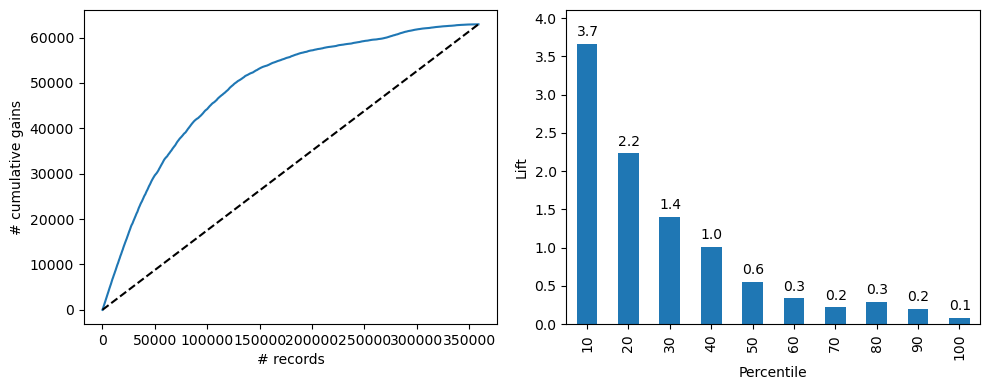

In [32]:
# gains and lift chart
logit_lasso_proba = logit_L1.predict_proba(X_valid_transformed)
logit_L1_result = pd.DataFrame({'actual': y_valid, 
                            'p(0)': [p[0] for p in logit_lasso_proba],
                            'p(1)': [p[1] for p in logit_lasso_proba],
                            'predicted': best_pred_l1,
                          })
logit_L1_result = logit_L1_result.sort_values(by=['p(1)'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(logit_L1_result.actual, ax=axes[0])
liftChart(logit_L1_result.actual, title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

In [33]:
# Lasso AUC score
auc_score_l1 = roc_auc_score(y_valid, y_proba_l1)
print(f"Lasso - Test AUC: {auc_score_l1:.4f}")

Lasso - Test AUC: 0.8352


### Lasso Summary:

I fit a logistic regression with L1 regularization using the SAGA solver and 5 fold cross-validation. SAGA was chosen because liblinear did not converge on this dataset. SAGA is better suited for large scale datasets. Predictors were standardized prior to fitting. The lasso penalty shrank several coefficients toward zero simplifying the model by selecting features.

The optimal threshold was 0.55, yielding a maximum profit of $1,801,770,912.50. At this cutoff, recall for the positive class was 0.78, with an overall accuracy of 75.5%. Precision was lower (0.40), reflecting the tradeoff of capturing defaults versus introducing false positives.

The gains and lift charts showed strong early ranking, with a lift of 3.7 in the first decile. The AUC was 0.84, confirming good separation between classes. Even though the profit was slightly lower than the unregularized logistic regression, Lasso produced a simpler model by shrinking many uninformative predictors to zero.

### Ridge

In [45]:
# fitting ridge with pipeline
LogitRidge_cv = Pipeline([
    ['normalize', StandardScaler(with_mean=True)],
    ['model', LogisticRegressionCV(penalty="l2", 
                                   solver='liblinear', 
                                   cv=5, 
                                   random_state=1, 
                                   class_weight={0: 1, 1: 5}, 
                                   Cs=20, 
                                   tol=1e-6, # slightly lower so it converges 
                                   max_iter=10000, 
                                   n_jobs=-1)],
])
LogitRidge_cv.fit(X_train, y_train)

Pipeline(steps=[('normalize', StandardScaler()),
                ['model',
                 LogisticRegressionCV(Cs=20, class_weight={0: 1, 1: 5}, cv=5,
                                      max_iter=10000, n_jobs=-1, random_state=1,
                                      solver='liblinear', tol=1e-06)]])

In [47]:
# validation probabilities from model
y_proba_l2 = LogitRidge_cv.predict_proba(X_valid)[:, 1]

print()
print('LogitRidge-CV chosen regularization: ', LogitRidge_cv['model'].C_)
print('LogitRidge-CV chosen lamba: ', 1/LogitRidge_cv['model'].C_)
print('')

pd.set_option('display.width', 95)
pd.set_option('display.precision',4)
pd.set_option('display.max_columns', 40)

print('Intercept ', LogitRidge_cv['model'].intercept_[0])
print(pd.DataFrame({'coeff': LogitRidge_cv['model'].coef_.ravel()}, index=X.columns).transpose())

pd.reset_option('display.width')
pd.reset_option('display.precision')
pd.reset_option('display.max_columns')


LogitRidge-CV chosen regularization:  [78.47599704]
LogitRidge-CV chosen lamba:  [0.01274275]

Intercept  -0.7157986376142129
         Term   NoEmp  NewExist  CreateJob  RetainedJob  UrbanRural  DisbursementGross  \
coeff -1.6728 -0.2927    0.0316     1.1948      -1.1421      0.2297             0.3132   

       State_MT_SD  State_ME_KS  State_CT_AR  State_IN_LA  State_CA_KY  State_MD_TN  \
coeff      -0.2618      -0.4796      -0.4604       -0.245      -0.3229      -0.3438   

       State_MI_DC  State_FL  Industry_0_62  Industry_33_32  Industry_54_71  Industry_72_51  \
coeff      -0.2407   -0.1267        -0.0737         -0.0724         -0.0086          0.0967   

       Industry_48_53  Zip_1_822  Zip_999_504  Zip_308_173  Zip_116_76  Zip_408_203  \
coeff          0.0417    -0.0318      -0.0943      -0.0032      0.1259        0.049   

       Zip_851_332  Zip_000  Zip_663  Zip_213_866  RevLineCr_clean_Unknown  \
coeff       0.0127   0.0671   0.0066       0.0412                   0.032

In [48]:
# Print summary information
print("Ridge with Weights Summary:")

# Find best threshold
best_pred_l2 = best_threshold(y_valid, y_proba_l2, disb_valid, cutoffs)

print("Confusion Matrix on test set:")
print(classificationSummary(y_valid, best_pred_l2, class_names=classes))

Ridge with Weights Summary:
Threshold: 0.00
Total Net Profit: $0.00
[[     0 295899]
 [     0  62915]]

Threshold: 0.05
Total Net Profit: $884,561,248.10
[[ 53437 242462]
 [   968  61947]]

Threshold: 0.10
Total Net Profit: $1,181,130,863.35
[[ 71472 224427]
 [  1778  61137]]

Threshold: 0.15
Total Net Profit: $1,291,219,031.85
[[ 82125 213774]
 [  2421  60494]]

Threshold: 0.20
Total Net Profit: $1,365,849,998.65
[[ 94522 201377]
 [  2998  59917]]

Threshold: 0.25
Total Net Profit: $1,440,614,654.55
[[110817 185082]
 [  3615  59300]]

Threshold: 0.30
Total Net Profit: $1,528,384,547.50
[[129781 166118]
 [  4362  58553]]

Threshold: 0.35
Total Net Profit: $1,612,966,377.90
[[150026 145873]
 [  5388  57527]]

Threshold: 0.40
Total Net Profit: $1,691,663,329.55
[[170673 125226]
 [  6670  56245]]

Threshold: 0.45
Total Net Profit: $1,756,493,666.05
[[190139 105760]
 [  8502  54413]]

Threshold: 0.50
Total Net Profit: $1,798,274,143.40
[[208498  87401]
 [ 10880  52035]]

Threshold: 0.55
To

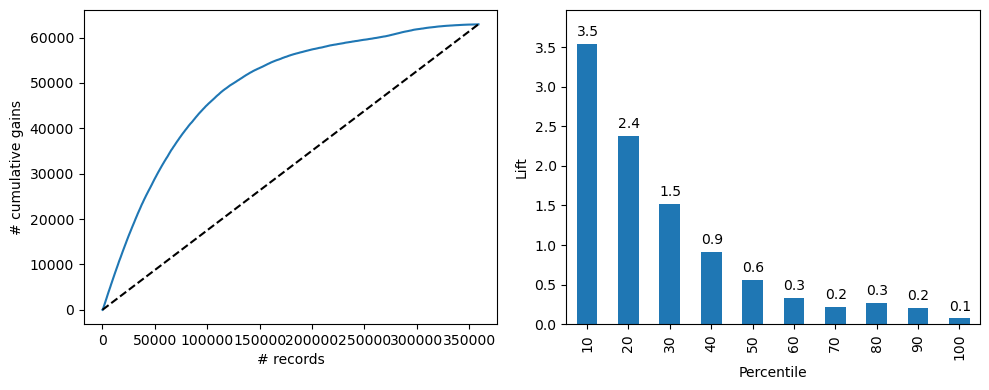

In [50]:
# gains and lift chart
logit_ridge_proba = LogitRidge_cv.predict_proba(X_valid)
ridge_result = pd.DataFrame({'actual': y_valid, 
                            'p(0)': [p[0] for p in logit_ridge_proba ],
                            'p(1)': [p[1] for p in logit_ridge_proba ],
                            'predicted': LogitRidge_cv.predict(X_valid),
                          })
ridge_result = ridge_result.sort_values(by=['p(1)'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(ridge_result.actual, ax=axes[0])
liftChart(ridge_result.actual, title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

In [51]:
# Ridge AUC score
auc_score_l2 = roc_auc_score(y_valid, y_proba_l2)
print(f"Ridge - Test AUC: {auc_score_l2:.4f}")

Ridge - Test AUC: 0.8376


### Ridge Summary:

I fit a logistic regression with L2 regularization using the liblinear solver and 5 fold cross-validation. The solver was chosen because SAGA failed to converge on this dataset and liblinear gave stable results for ridge. A grid of 20 values for the regularization strength was searched, and convergence was improved by lowering the tolerance to 1e-6 with 10,000 maximum iterations. The predictors were standardized with pipeline.

The optimal threshold was 0.55, resulting in a maximum profit of $1,814,081,252.95. At this cutoff, recall for the positive class was 0.78, with an overall accuracy of 76.6%. Precision was 0.41, showing the familiar tradeoff of higher sensitivity (recall) at the expense of more false positives.

Lift is strong in early deciles, and the model achieved similar performance to lasso with slightly higher profit. Ridge penalization differs by shrinking coefficients without completely deleting them, which preserves more predictors while still controlling overfitting.

### Elastic Net

In [18]:
ElasticNet = Pipeline([
    ['normalize', StandardScaler(with_mean=True)],
    ['model', LogisticRegressionCV(
    penalty='elasticnet',
    solver='saga',
    cv=3,
    scoring='roc_auc',
    max_iter=10000,
    l1_ratios=np.arange(0.1, 0.95, 0.05),   # Elastic Net mixing ratio
    Cs=10,                           # Inverse regularization strengths to try
    refit=True,
    random_state=1,
    n_jobs=-1
    )]
])
ElasticNet.fit(X_train, y_train)

Pipeline(steps=[('normalize', StandardScaler()),
                ['model',
                 LogisticRegressionCV(cv=3,
                                      l1_ratios=array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ]),
                                      max_iter=10000, n_jobs=-1,
                                      penalty='elasticnet', random_state=1,
                                      scoring='roc_auc', solver='saga')]])

In [23]:
# validation probabilities from model
y_proba_en = ElasticNet.predict_proba(X_valid)[:, 1]

print('Elastic Net chosen regularization: ', ElasticNet['model'].C_)
print('Elastic Net chosen lamba: ', 1/ElasticNet['model'].C_)
print("Best l1_ratio:", ElasticNet['model'].l1_ratio_[0])
print('')

pd.set_option('display.width', 95)
pd.set_option('display.precision',4)
pd.set_option('display.max_columns', 40)

print('Intercept ', ElasticNet['model'].intercept_[0])
print(pd.DataFrame({'coeff': ElasticNet['model'].coef_.ravel()}, index=X.columns).transpose())

pd.reset_option('display.width')
pd.reset_option('display.precision')
pd.reset_option('display.max_columns')


Elastic Net chosen regularization:  [10000.]
Elastic Net chosen lamba:  [0.0001]
Best l1_ratio: 0.9000000000000002

Intercept  -2.5331018520819524
         Term   NoEmp  NewExist  CreateJob  RetainedJob  UrbanRural  DisbursementGross  \
coeff -2.0435 -0.5982    0.0248     0.4128      -0.3348      0.1884             0.1766   

       State_MT_SD  State_ME_KS  State_CT_AR  State_IN_LA  State_CA_KY  State_MD_TN  \
coeff      -0.1147      -0.1436      -0.0755         0.01       0.1273      -0.0042   

       State_MI_DC  State_FL  Industry_0_62  Industry_33_32  Industry_54_71  Industry_72_51  \
coeff       0.0436    0.0891         -0.101         -0.0664      3.9478e-05          0.1072   

       Industry_48_53  Zip_1_822  Zip_999_504  Zip_308_173  Zip_116_76  Zip_408_203  \
coeff          0.0411    -0.0347      -0.1205      -0.0029      0.1378        0.052   

       Zip_851_332  Zip_000  Zip_663  Zip_213_866  RevLineCr_clean_Unknown  \
coeff       0.0129   0.0611   0.0082       0.0172    

In [27]:
# Print summary information
print("Elastic Net with Weights Summary:")

# Find best threshold
best_pred_en = best_threshold(y_valid, y_proba_en, disb_valid, cutoffs)

print("Confusion Matrix on test set:")
print(classificationSummary(y_valid, best_pred_en, class_names=ElasticNet.classes_))

Elastic Net with Weights Summary:
Threshold: 0.00
Total Net Profit: $0.00
[[     0 295899]
 [     0  62915]]

Threshold: 0.05
Total Net Profit: $1,436,758,643.75
[[104646 191253]
 [  3838  59077]]

Threshold: 0.10
Total Net Profit: $1,684,865,148.75
[[155287 140612]
 [  6018  56897]]

Threshold: 0.15
Total Net Profit: $1,816,125,389.70
[[196424  99475]
 [  9196  53719]]

Threshold: 0.20
Total Net Profit: $1,852,694,964.70
[[226110  69789]
 [ 13113  49802]]

Threshold: 0.25
Total Net Profit: $1,835,282,058.70
[[246551  49348]
 [ 17712  45203]]

Threshold: 0.30
Total Net Profit: $1,770,625,610.65
[[260765  35134]
 [ 23020  39895]]

Threshold: 0.35
Total Net Profit: $1,691,510,568.90
[[270975  24924]
 [ 28296  34619]]

Threshold: 0.40
Total Net Profit: $1,605,942,262.05
[[278174  17725]
 [ 33667  29248]]

Threshold: 0.45
Total Net Profit: $1,512,752,089.40
[[283486  12413]
 [ 38975  23940]]

Threshold: 0.50
Total Net Profit: $1,420,554,319.50
[[287320   8579]
 [ 44234  18681]]

Threshold:

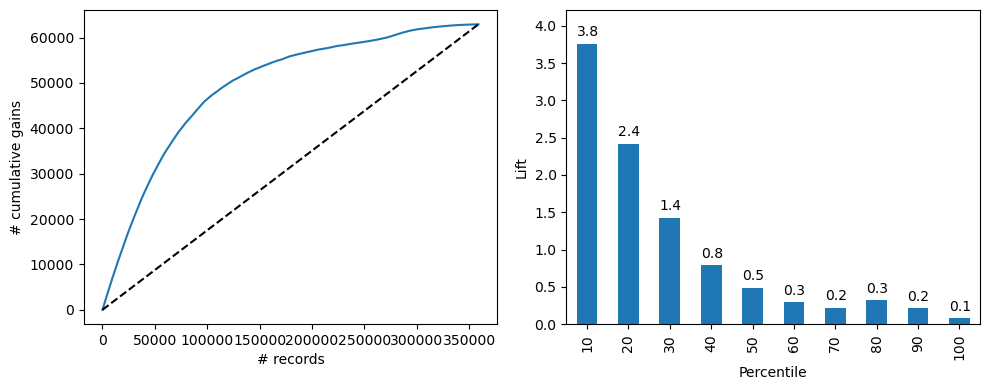

In [25]:
# Gains and Lift charts
elasticnet_proba = ElasticNet.predict_proba(X_valid)
elasticnet_result = pd.DataFrame({'actual': y_valid, 
                            'p(0)': [p[0] for p in elasticnet_proba],
                            'p(1)': [p[1] for p in elasticnet_proba],
                            'predicted': best_pred_en,
                          })
elasticnet_result = elasticnet_result.sort_values(by='p(1)', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(elasticnet_result.actual, ax=axes[0])
liftChart(elasticnet_result.actual, title=False, ax=axes[1])

plt.tight_layout()
plt.show()

In [26]:
# ElasticNet AUC score
auc_score_en = roc_auc_score(y_valid, y_proba_en)
print(f"Elastic Net - Test AUC: {auc_score_en:.4f}")

Elastic Net - Test AUC: 0.8439


### Elastic Net Summary:
The Elastic Net model was tuned across different mixing ratios and regularization strengths with normalized predictors. The chosen settings were a very small regularization parameter with a high l1_ratio (0.90). This means the model was closer to the lasso model and it applied stronger feature selection while still keeping some ridge regularization for stability.

Key coefficients included loan term (-2.04) and number of employees (-0.60), suggesting longer terms and larger firms were less likely to default. On the other hand, job creation (0.41) and gross disbursement amount (0.18) had positive contributions toward the prediction. 

The best cutoff was determined to be 0.20 and the model achieved a net profit of $1,852,694,964.70. On the test set, it reached 77% accuracy, with a recall of 0.79 for the default class. This showed a good ability to catch defaults at the expense of lower precision (0.42). The lift chart showed gains in the early deciles, meaing that the model ranked risky loans above safer ones reasonably well.

#### Nueral Net

In [19]:
# Define pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('mlp', MLPClassifier(activation='relu', max_iter=10000, random_state=1)) # solver='sgd'
])

# Tune: hidden layer size, learning rate, and alpha (L2 regularization strength)
param_grid = {
    'mlp__hidden_layer_sizes': [(i,) for i in range(1, 21)],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__alpha': [0.001, 0.01, 0.1],
    # 'mlp__learning_rate_init': [0.001, 0.01] # for sgd
}

# Grid search
grid_search_nn = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='recall',
    verbose=1,
    n_jobs=-1
)

# Fit grid search on training data
grid_search_nn.fit(X_train, y_train)

# Best model evaluation
best_model_nn = grid_search_nn.best_estimator_

# default threshold 0.5
#y_pred_nn = best_model_nn.predict(X_valid)

print("Best Parameters for Nueral Network:")
print(grid_search_nn.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best Parameters for Nueral Network:
{'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (17,), 'mlp__learning_rate': 'constant'}


In [20]:
# Probabilities from model
y_proba_nn = best_model_nn.predict_proba(X_valid)[:, 1]

print("Nueral Net with Weights Summary:")

# Find best threshold
best_pred_nn = best_threshold(y_valid, y_proba_nn, disb_valid, cutoffs)

print("Confusion Matrix on test set:")
print(classificationSummary(y_valid, best_pred_nn, class_names=grid_search_nn.classes_))

Nueral Net with Weights Summary:
Threshold: 0.00
Total Net Profit: $0.00
[[     0 295899]
 [     0  62915]]

Threshold: 0.05
Total Net Profit: $1,538,830,310.35
[[157535 138364]
 [  2621  60294]]

Threshold: 0.10
Total Net Profit: $1,979,308,203.35
[[207766  88133]
 [  5442  57473]]

Threshold: 0.15
Total Net Profit: $2,104,109,288.45
[[230653  65246]
 [  8102  54813]]

Threshold: 0.20
Total Net Profit: $2,132,034,912.35
[[243785  52114]
 [ 10568  52347]]

Threshold: 0.25
Total Net Profit: $2,115,909,407.10
[[253122  42777]
 [ 12797  50118]]

Threshold: 0.30
Total Net Profit: $2,078,011,666.90
[[261174  34725]
 [ 15152  47763]]

Threshold: 0.35
Total Net Profit: $2,018,359,261.25
[[266557  29342]
 [ 17586  45329]]

Threshold: 0.40
Total Net Profit: $1,957,550,098.90
[[271381  24518]
 [ 19967  42948]]

Threshold: 0.45
Total Net Profit: $1,892,978,693.15
[[275621  20278]
 [ 22605  40310]]

Threshold: 0.50
Total Net Profit: $1,823,159,971.45
[[279352  16547]
 [ 25366  37549]]

Threshold: 

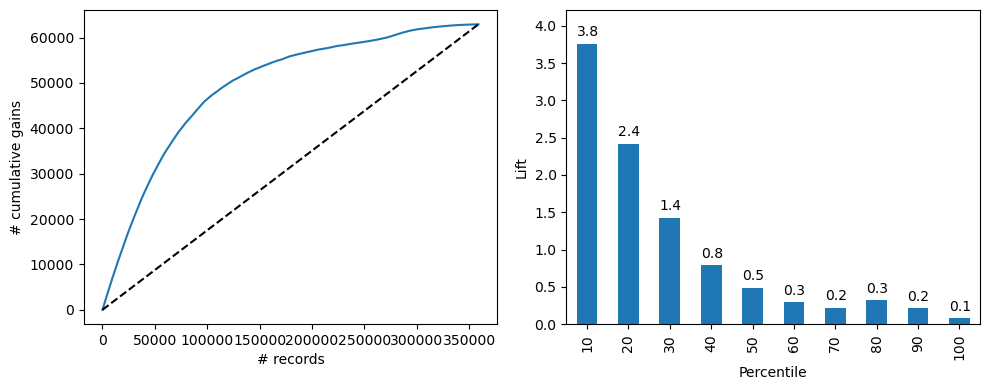

In [21]:
# Gains and Lift charts
nueralnet_proba = ElasticNet.predict_proba(X_valid)
nueralnet_result = pd.DataFrame({'actual': y_valid, 
                            'p(0)': [p[0] for p in nueralnet_proba],
                            'p(1)': [p[1] for p in nueralnet_proba],
                            'predicted': best_pred_nn,
                          })
nueralnet_result = nueralnet_result.sort_values(by='p(1)', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(nueralnet_result.actual, ax=axes[0])
liftChart(nueralnet_result.actual, title=False, ax=axes[1])

plt.tight_layout()
plt.show()

In [22]:
# Nueral Net AUC score
auc_score_nn = roc_auc_score(y_valid, y_proba_nn)
print(f"Nueral Net - Test AUC: {auc_score_nn:.4f}")

Nueral Net - Test AUC: 0.9021


#### Nueral Net Analysis:

For the neural network, I built an MLPClassifier with one hidden layer of 17 nodes, ReLU activation function, and L2 regularization (alpha=0.001). I originally wanted to use the SGD solver since it gives more control over the learning rate and can generalize well, but it was too slow to converge with this dataset, so I went with the faster and more practical 'adam' solver. I also commented out the learning_rate_init setting since it only applied to SGD. 

The single hidden layer worked well because the data wasn’t overly complex, and 17 nodes gave the model enough flexibility without overfitting and relu activation was a good choice for capturing nonlinear relationships. Finally the L2 penalty helped keep the weights under control. The best setup from the hyperparameter tuning used a constant learning rate and focused on recall which successfully identifying 83% of defaults. From the threshold evaluation, with a cutoff of 0.20 the model delivered a net profit of about $2,132,034,912.35.

### Discriminant Analysis

In [40]:
# fitting model
lda_reg = LinearDiscriminantAnalysis()
lda_reg.fit(X_train, y_train)

print('Intercept', lda_reg.intercept_)
print('Coefficients', lda_reg.coef_)

Intercept [0.34034466]
Coefficients [[-1.26284330e-02 -4.45994557e-04 -2.08840073e-02  1.75096541e-03
  -1.57118838e-03  2.32716261e-01  3.28593704e-07 -5.58604305e-01
  -4.60339517e-01 -2.94426908e-01 -7.42129853e-02  1.99059509e-01
  -9.52722445e-02  3.55500690e-02  3.65863119e-01 -1.97607256e-01
  -3.10939411e-01 -1.74986983e-02  2.17679384e-01  2.85396248e-01
  -2.66287889e-01 -2.43804022e-01 -1.51792972e-04  5.95288739e-01
   1.02952217e+00  1.78929981e+00  4.10433731e+00  3.63720405e+00
   6.42281481e+00  6.35344949e-01 -5.43007052e-01 -1.21148631e+00
  -1.07869205e+00  2.40217064e-01 -6.80812304e-01]]


In [41]:
# predicting with default 0.5 threshold
y_pred_lda = lda_reg.predict(X_valid)

# Probabilities from model
y_proba_lda = lda_reg.predict_proba(X_valid)[:, 1]

# Print summary information
print("Discriminant Analysis Summary:")

# Find best threshold
best_pred_lda = best_threshold(y_valid, y_proba_lda, disb_valid, cutoffs)

print("Confusion Matrix on test set:")
print(classificationSummary(y_valid, best_pred_lda, class_names=classes))


Discriminant Analysis Summary:
Threshold: 0.00
Total Net Profit: $0.00
[[     0 295899]
 [     0  62915]]

Threshold: 0.05
Total Net Profit: $1,221,583,006.00
[[ 81031 214868]
 [  2072  60843]]

Threshold: 0.10
Total Net Profit: $1,586,121,132.65
[[145232 150667]
 [  5517  57398]]

Threshold: 0.15
Total Net Profit: $1,733,024,261.25
[[194315 101584]
 [ 11198  51717]]

Threshold: 0.20
Total Net Profit: $1,707,551,761.15
[[223920  71979]
 [ 18155  44760]]

Threshold: 0.25
Total Net Profit: $1,636,545,692.30
[[244702  51197]
 [ 24728  38187]]

Threshold: 0.30
Total Net Profit: $1,570,706,657.40
[[259298  36601]
 [ 30403  32512]]

Threshold: 0.35
Total Net Profit: $1,502,317,730.80
[[269407  26492]
 [ 35777  27138]]

Threshold: 0.40
Total Net Profit: $1,436,575,763.90
[[277428  18471]
 [ 40774  22141]]

Threshold: 0.45
Total Net Profit: $1,363,778,778.55
[[283936  11963]
 [ 45545  17370]]

Threshold: 0.50
Total Net Profit: $1,303,169,343.85
[[288686   7213]
 [ 49767  13148]]

Threshold: 0.

### Linear Discriminant Analysis (LDA) model Summary: 
I fit a LDA model to classify loan defaults. This method does not require tuning hyperparameters, making it straightforward to implement.

The optimal threshold was 0.15, yielding a maximum profit of $1,733,024,261.25. At this cutoff, recall for the positive class was 0.82, though overall accuracy dropped to 68.6%. Precision was relatively low (0.34), highlighting the tradeoff of recovering more defaults at the cost of more false positives.

Although less accurate overall than logistic regression and tree-based methods, LDA still produced a substantial net profit and demonstrated the value of linear separation assumptions. It provides a simple benchmark against which more flexible models can be compared.

### Model Comparison

| Model | Optimal Threshold | Net Profit | Recall     |    
| ------| ----------------- | ---------- | ---------- | 
| KNN   |0.05 | \$1,961,538,136.95   |0.80     |
| Single Tree | 0.85 | \$2,275,642,821.25 | 0.74 | 
| Bagging   | 0.20 | \$2,688,599,027.00 | 0.92 |
| XGBoost   | 0.40 | \$2,568,487,098.6 | 0.94 | 
| **Random Forest** | 0.30 | **\$2,698,678,749.35** | 0.94 |
| Logit (No reg)| 0.20 | \$1,849,989,566.45 | 0.79 |
| Lasso       |0.55 | \$1,801,770,912.5 | 0.78 |
| Ridge       |0.55 | \$1,814,081,252.95 | 0.78 |
| Elastic Net |0.20 |\$1,852,694,964.70 |   0.79 |  
| Nueral Net       |  0.20 | \$2,132,034,912.35 | 0.83 |  
| Discriminant Analysis |0.15 | \$1,733,024,261.25 | 0.82 |

#### Key observations:

In this case, where the dataset is imbalanced, it is more appropriate to focus on the recall for the default class rather than the overall accuracy of the model. It makes more sense to prioritize recall because misclassifying a potential default is much more costly than incorrectly labeling a safe borrower as risky.

The classification tree models (Random Forest, Bagging, and XGBoost) consistently outperformed the others, achieving both over 90% recall and the highest net profits. Among them, Random Forest was the strongest, reaching a recall of 94% with the maximum profit of $2.7 billion. This makes it the most effective model for minimizing expensive defaults and maximizing returns. It captured risky borrowers effectively while also avoiding excessive rejection of safe borrowers. 

The feature importance values show how much each variable contributed to reducing prediction error in the random forest model. In the best model, random forest, Term is the most influential predictor of default loans. After that, variables like DisbursementGross (0.06) and UrbanRural (0.05) have some influence. In practical terms, it suggests that businesses with shorter loan terms, smaller disbursement amounts, and those in urban areas are less likely to default. Other features like ZIP code and state contributed very little, reinforcing that loan characteristics matter more than location in predicting default.

Using this model can provide direct business value by helping a the business identify which customers are likely to default on a loan before approval. If they have the ability to flag higher risk applicants, they can reduce the amount of default loans and save money. This can also open the door to enhance their lending strategies and even their risk policies. One potential improvement for the future is to retrain the models using the reduced set of predictors, specifically those identified as most important through the feature importance analysis. 

# PART 3
Use the estimated probabilities (propensities) from your chosen model as a basis for selecting the least risky loan application first, followed by more risky loan applications. Create a vector containing the net profit for each loan application in the validation set. Use this vector to create gains and lift charts for the validation set that incorporates the net profit.

a. How far into the validation data should you go to get maximum net profit?

b. If this model is used to score to future loan applicants, what “probability of success” cut-off should be used in granting the loan and extending credit?

In [47]:
# chosen model - Random Forest

myModel = best_model_rf_cw


# predicted probability of success (PIF)
y_proba = myModel.predict_proba(X_valid)[:, 0]


disb_valid = sba_df.loc[X_valid.index, 'DisbursementGross']

In [43]:
df_val = pd.DataFrame({
    "y_actual": y_valid,                  
    "Probability": y_proba,  # predicted probability of PIF
    "DisbursementGross": disb_valid
})


df_val["potentialProfit"] = 0.05 * df_val["DisbursementGross"]
df_val["potentialLoss"] = -5 * df_val["potentialProfit"]

df_val["Profit"] = np.where(
    df_val["y_actual"] == 0,   # 0 = Paid in Full
    df_val["potentialProfit"],
    df_val["potentialLoss"]
)

# Sorting loans by least risky first
df_val = df_val.sort_values(by="Probability", ascending=False)
df_val

,y_actual,Probability,DisbursementGross,potentialProfit,potentialLoss,Profit
556853,0,1.000000,1162000.0,58100.0,-290500.0,58100.0
708816,0,1.000000,350000.0,17500.0,-87500.0,17500.0
549313,0,1.000000,269000.0,13450.0,-67250.0,13450.0
682275,0,1.000000,838000.0,41900.0,-209500.0,41900.0
452308,0,1.000000,1900000.0,95000.0,-475000.0,95000.0
...,...,...,...,...,...,...
335855,1,0.000754,7500.0,375.0,-1875.0,-1875.0
349630,1,0.000713,7500.0,375.0,-1875.0,-1875.0
292442,1,0.000640,12500.0,625.0,-3125.0,-3125.0
338316,1,0.000500,10000.0,500.0,-2500.0,-2500.0


In [44]:
# dropping the original index to avoid confusion
df_val = df_val.reset_index(drop=True)

# getting cumulative profit
df_val["CumulativeProfit"] = df_val["Profit"].cumsum()

# max profit
maxProfit = df_val['CumulativeProfit'].max()

# finding row with max profit
row = df_val.loc[df_val['CumulativeProfit'] == maxProfit]
row

,y_actual,Probability,DisbursementGross,potentialProfit,potentialLoss,Profit,CumulativeProfit
271419,0,0.699275,300000.0,15000.0,-75000.0,15000.0,2.699232e+09


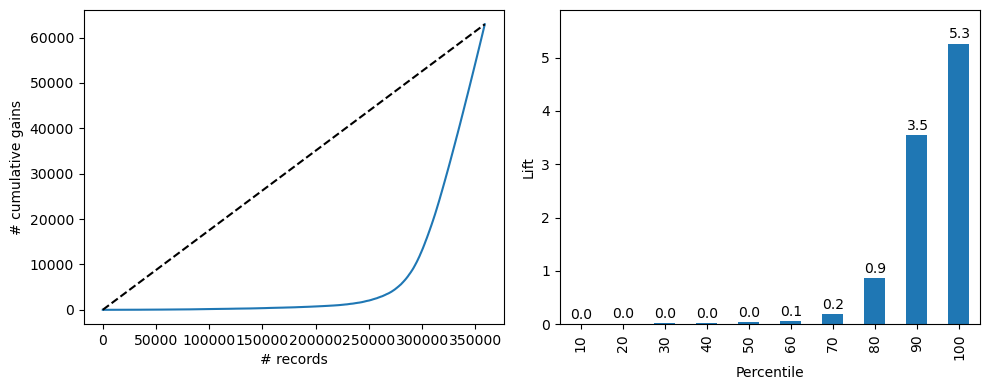

In [45]:
# Gains and Lift charts

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df_val.y_actual, ax=axes[0])
liftChart(df_val.y_actual, title=False, ax=axes[1])

plt.tight_layout()
plt.show()

# Part 3 Analysis
Maximum cumulative profit: $2,699,232,000
### a. How far into the validation data should you go to get maximum net profit?
By ranking loan applications from least risky to most risky, the cumulative profit curve peaks at around 270,000 applications. Beyond this point, additional loans add more risk than return, and the cumulative profit curve begins to flatten.

### b. What probability cutoff should be used when scoring future applicants?
The maximum cumulative profit occurs at a Paid in Full probability of about 0.70. This corresponds to a default probability cutoff of about 0.30. In practice, this means future loans should only be approved when the model estimates the chance of default is below 30%.